In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.model_selection import train_test_split

In [53]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Importing and Cleaning

In [54]:
banking = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/BANKING SECTOR.xlsx")
auto = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/AUTO SECTOR.xlsx")
pharma = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PHARMA SECTOR.xlsx")
fmcg = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FMCG SECTOR.xlsx")
tech = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/TECH SECTOR.xlsx")
# Check for missing values for each sector
missing_values = banking.isnull().sum()
print(missing_values)
# There are no observed missing values in the bamking data
missing_values = auto.isnull().sum()
print(missing_values)
# The data is missing values of GM, TSLA and NIO as there is no data for that time.
missing_values = pharma.isnull().sum()
print(missing_values)
# There are no observed missing values in the pharmaceutical data
missing_values = tech.isnull().sum()
print(missing_values)
# The data is missing for Netflix, Google, CRM as they were not public yet
missing_values = fmcg.isnull().sum()
print(missing_values)
# Two companies did not have data from 2000
# Check for duplicates for each sector
duplicate1 = banking.duplicated().sum()
duplicate2 = auto.duplicated().sum()
duplicate3 = tech.duplicated().sum()
duplicate4 = pharma.duplicated().sum()
duplicate5 = fmcg.duplicated().sum()
print(f"Duplicate Rows: {duplicate1}")
print(f"Duplicate Rows: {duplicate2}")
print(f"Duplicate Rows: {duplicate3}")
print(f"Duplicate Rows: {duplicate4}")
print(f"Duplicate Rows: {duplicate5}")
# There are no observed duplicate rows
# Making sure that we are using the correct dates for each sector
banking['Date'] = pd.to_datetime(banking['Date'])
banking = banking.iloc[:5993]
banking = banking.sort_values(by='Date')
fmcg['Date'] = pd.to_datetime(fmcg['Date'])
fmcg = fmcg.iloc[:5993]
fmcg = fmcg.sort_values(by='Date')
pharma['Date'] = pd.to_datetime(pharma['Date'])
pharma = pharma.iloc[:5993]
pharma = pharma.sort_values(by='Date')
tech['Date'] = pd.to_datetime(tech['Date'])
tech = tech.iloc[:5993]
tech = tech.sort_values(by='Date')
auto['Date'] = pd.to_datetime(auto['Date'])
auto = auto.iloc[:5993]
auto = auto.sort_values(by='Date')
# Calculating Returns and summary statistics for each sector
tech.set_index('Date', inplace=True)
techr = tech.pct_change()
techr.describe()
banking.set_index('Date', inplace=True)
bankingr = banking.pct_change()
bankingr.describe()
auto.set_index('Date', inplace=True)
autor = auto.pct_change()
autor.describe()
pharma.set_index('Date', inplace=True)
pharmar = pharma.pct_change()
pharmar.describe()
fmcg.set_index('Date', inplace=True)
fmcgr = fmcg.pct_change()
fmcgr.describe()
data_frames = [pharma, tech, banking, fmcg, auto]
finaldf = pd.concat(data_frames, axis=1)
finaldfr= finaldf.pct_change()
drop = ['GM','TSLA', 'NIO', 'NFLX', 'GOOGL', 'CRM', 'MDLZ', 'NSRGF' ]
finaldfr = finaldfr.drop(columns=drop)
finaldfr

Date    0
BOFA    0
JPM     0
WFC     0
C       0
GS      0
MS      0
PNC     0
USB     0
FITB    0
KEY     0
dtype: int64
Date       0
F          0
TM         0
HMC        0
HOG        0
CMI        0
GT         0
ALV        0
ORLY       0
BWA        0
MGA        0
GM      2751
TSLA    2651
NIO     4717
dtype: int64
Date    0
PFE     0
BMY     0
ROG     0
NVS     0
MRK     0
GSK     0
AZN     0
LLY     0
ABT     0
AMGN    0
dtype: int64
Date        0
AAPL        0
MSFT        0
AMZN        0
NVDA        0
INTC        0
IBM         0
CSCO        0
ORCL        0
ADBE        0
NFLX      612
GOOGL    1176
CRM      1136
QCOM        0
dtype: int64
Date        0
PG          0
KO          0
CLX         0
CL          0
UL          0
PEP         0
JNJ         0
KMB         0
HSY         0
GIS         0
MDLZ      378
NSRGF    1429
dtype: int64
Duplicate Rows: 0
Duplicate Rows: 0
Duplicate Rows: 0
Duplicate Rows: 0
Duplicate Rows: 0


PFE       BMY       ROG       NVS       MRK       GSK  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.037255 -0.075655 -0.029703 -0.018902 -0.035119 -0.025872   
2000-01-05  0.016294 -0.010492  0.013605  0.004379  0.039271  0.033487   
2000-01-06  0.036071  0.013785  0.036913  0.021798  0.008296 -0.014525   
2000-01-07  0.067697  0.146443  0.025890  0.015358  0.095977  0.052153   
...              ...       ...       ...       ...       ...       ...   
2023-10-20 -0.017313 -0.000354  0.000724  0.000423  0.022304  0.005369   
2023-10-23  0.006199 -0.008147 -0.010774  0.000106  0.006623  0.006183   
2023-10-24 -0.013294  0.002143  0.001869  0.002323 -0.003096  0.005028   
2023-10-25  0.009859  0.008731 -0.044053  0.005479  0.005824  0.001946   
2023-10-26  0.013993 -0.064300  0.010863 -0.011841  0.018527 -0.010264   

                 AZN       LLY       ABT      AMGN  ...         F        TM  \
Date                                                ...                       
2000-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-04 -0.033433 -0.031459 -0.028575 -0.076472  ... -0.033412 -0.046332   
2000-01-05  0.004716  0.012795 -0.001840  0.034409  ...  0.003703  0.004049   
2000-01-06 -0.003131  0.029155  0.034994  0.016632  ...  0.001229 -0.088710   
2000-01-07  0.042389  0.073654  0.010674  0.112474  ...  0.073710  0.014749   
...              ...       ...       ...       ...  ...       ...       ...   
2023-10-20 -0.009159 -0.010427  0.014040 -0.006379  ...  0.009540 -0.006983   
2023-10-23 -0.012220 -0.013667 -0.010333 -0.020623  ... -0.013746  0.001902   
2023-10-24  0.024108  0.027365 -0.010127  0.011206  ... -0.007840  0.001784   
2023-10-25 -0.005575 -0.010077 -0.013079 -0.014342  ...  0.013169  0.006088   
2023-10-26 -0.012459 -0.031306  0.004382 -0.009002  ... -0.016464 -0.020379   

                 HMC       HOG       CMI        GT       ALV      ORLY  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.019818 -0.020020 -0.027731  0.006897 -0.021185 -0.072651   
2000-01-05 -0.020219 -0.007152  0.001391 -0.031963  0.015154  0.006219   
2000-01-06 -0.051591 -0.003088  0.035255  0.007075  0.002131 -0.056026   
2000-01-07  0.037170 -0.005158  0.026170  0.037471  0.034040 -0.122188   
...              ...       ...       ...       ...       ...       ...   
2023-10-20 -0.003993  0.010406 -0.011322 -0.008078  0.070090  0.009651   
2023-10-23 -0.007401 -0.010299 -0.013185 -0.016287 -0.004767 -0.031299   
2023-10-24  0.001243 -0.018798  0.013407  0.012417 -0.000312 -0.007591   
2023-10-25  0.002172 -0.014027 -0.002828  0.000000  0.011354  0.003349   
2023-10-26 -0.022291 -0.064539 -0.002196  0.008994 -0.018642  0.053399   

                 BWA       MGA  
Date                            
2000-01-03       NaN       NaN  
2000-01-04  0.000000  0.010578  
2000-01-05  0.004843  0.010457  
2000-01-06 -0.012844  0.022186  
2000-01-07  0.027682  0.069474  
...              ...       ...  
2023-10-20  0.013120  0.008517  
2023-10-23 -0.009842 -0.005892  
2023-10-24  0.004447  0.003951  
2023-10-25 -0.007031 -0.017710  
2023-10-26  0.003409 -0.008814  

[5993 rows x 50 columns]

Exploratory Data Analysis

Text(0.5, 1.0, 'Closing Price Distribution for Pharma')

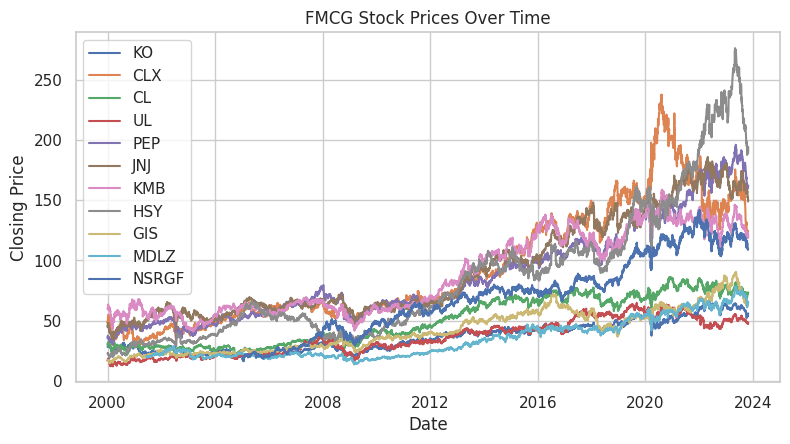

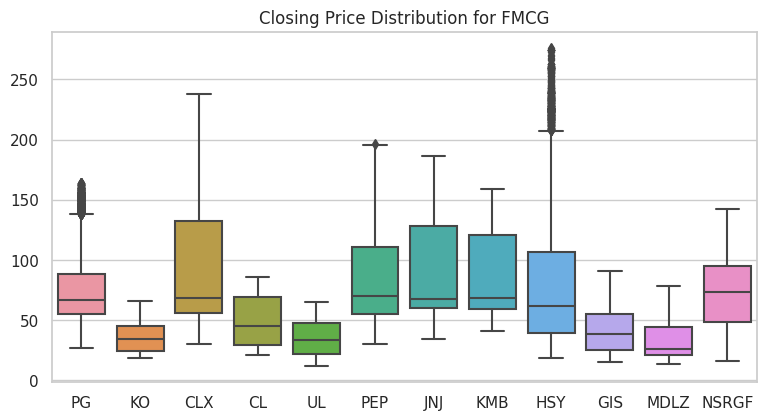

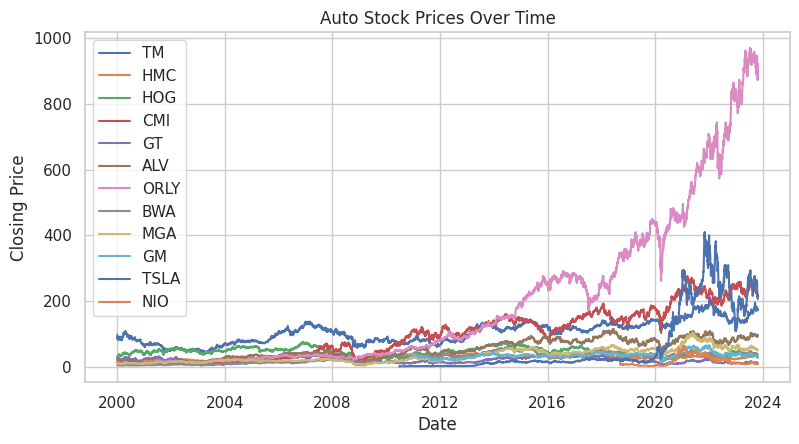

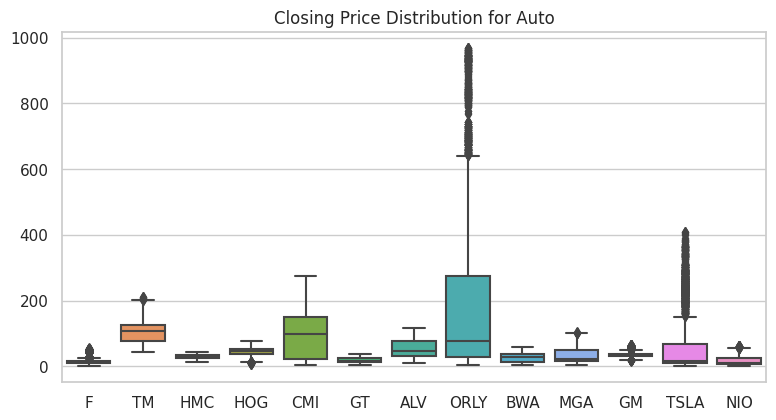

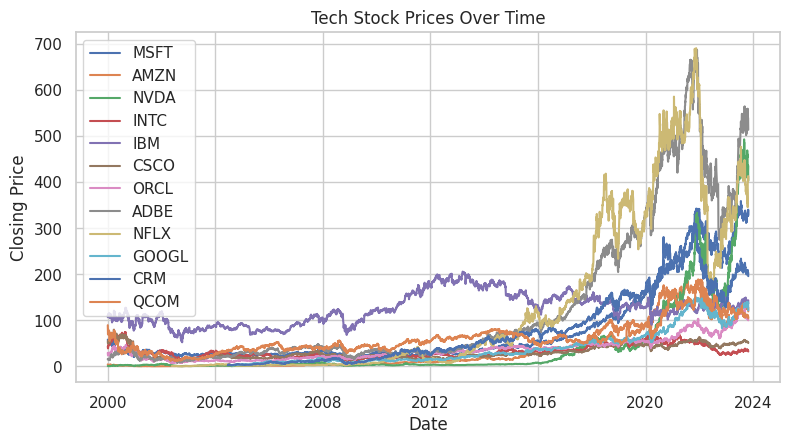

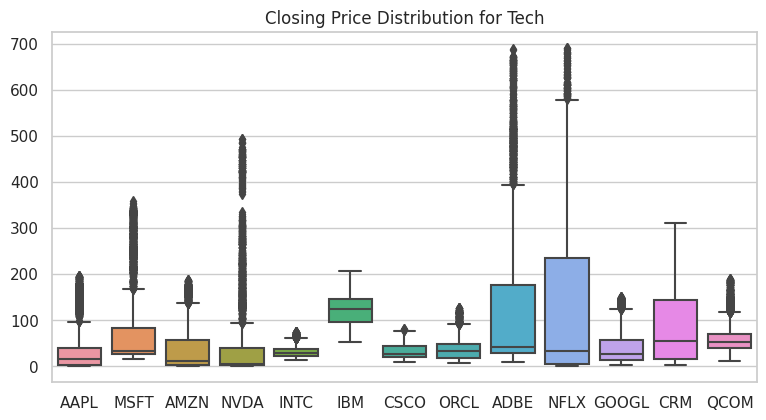

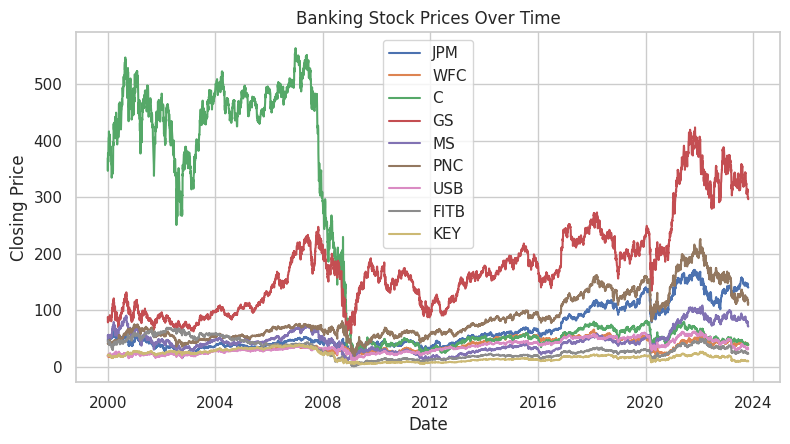

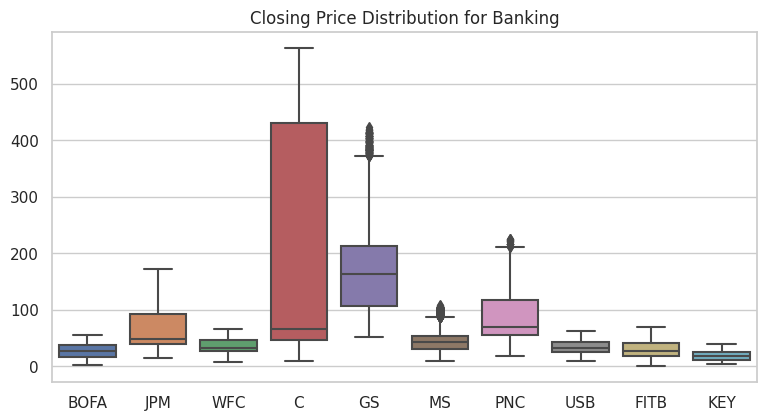

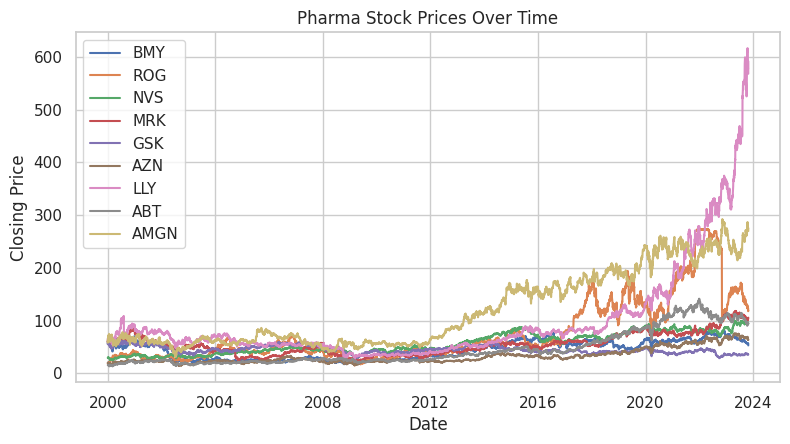

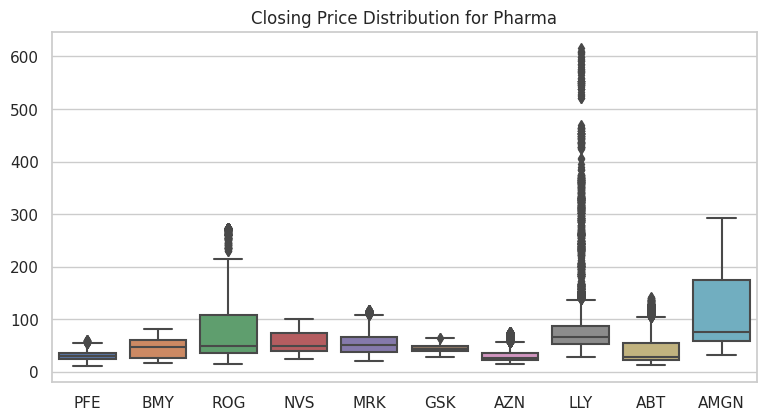

In [55]:
#FMCG
# Plot 1: Line plot for each stock's closing price over time
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
for stock in fmcg.columns[1:]:
    plt.plot(fmcg.index, fmcg[stock], label=stock)
plt.title('FMCG Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.figure(figsize=(20,10))

# Plot 2: Boxplot for each stock's closing price distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=fmcg)
plt.title('Closing Price Distribution for FMCG')

#Auto
# Plot 1: Line plot for each stock's closing price over time
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
for stock in auto.columns[1:]:
    plt.plot(auto.index, auto[stock], label=stock)
plt.title('Auto Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.figure(figsize=(20,10))

# Plot 2: Boxplot for each stock's closing price distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=auto)
plt.title('Closing Price Distribution for Auto')

# Tech
# Plot 1: Line plot for each stock's closing price over time
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
for stock in tech.columns[1:]:
    plt.plot(tech.index, tech[stock], label=stock)
plt.title('Tech Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.figure(figsize=(20,10))

# Plot 2: Boxplot for each stock's closing price distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=tech)
plt.title('Closing Price Distribution for Tech')

# Banking
# Plot 1: Line plot for each stock's closing price over time
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
for stock in banking.columns[1:]:
    plt.plot(banking.index, banking[stock], label=stock)
plt.title('Banking Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.figure(figsize=(20,10))

# Plot 2: Boxplot for each stock's closing price distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=banking)
plt.title('Closing Price Distribution for Banking')

# Pharma
# Plot 1: Line plot for each stock's closing price over time
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
for stock in pharma.columns[1:]:
    plt.plot(pharma.index, pharma[stock], label=stock)
plt.title('Pharma Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.figure(figsize=(20,10))

# Plot 2: Boxplot for each stock's closing price distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=pharma)
plt.title('Closing Price Distribution for Pharma')


Based on EDA, we created 5 different timelines and correlation matrices for each timeline for each sector

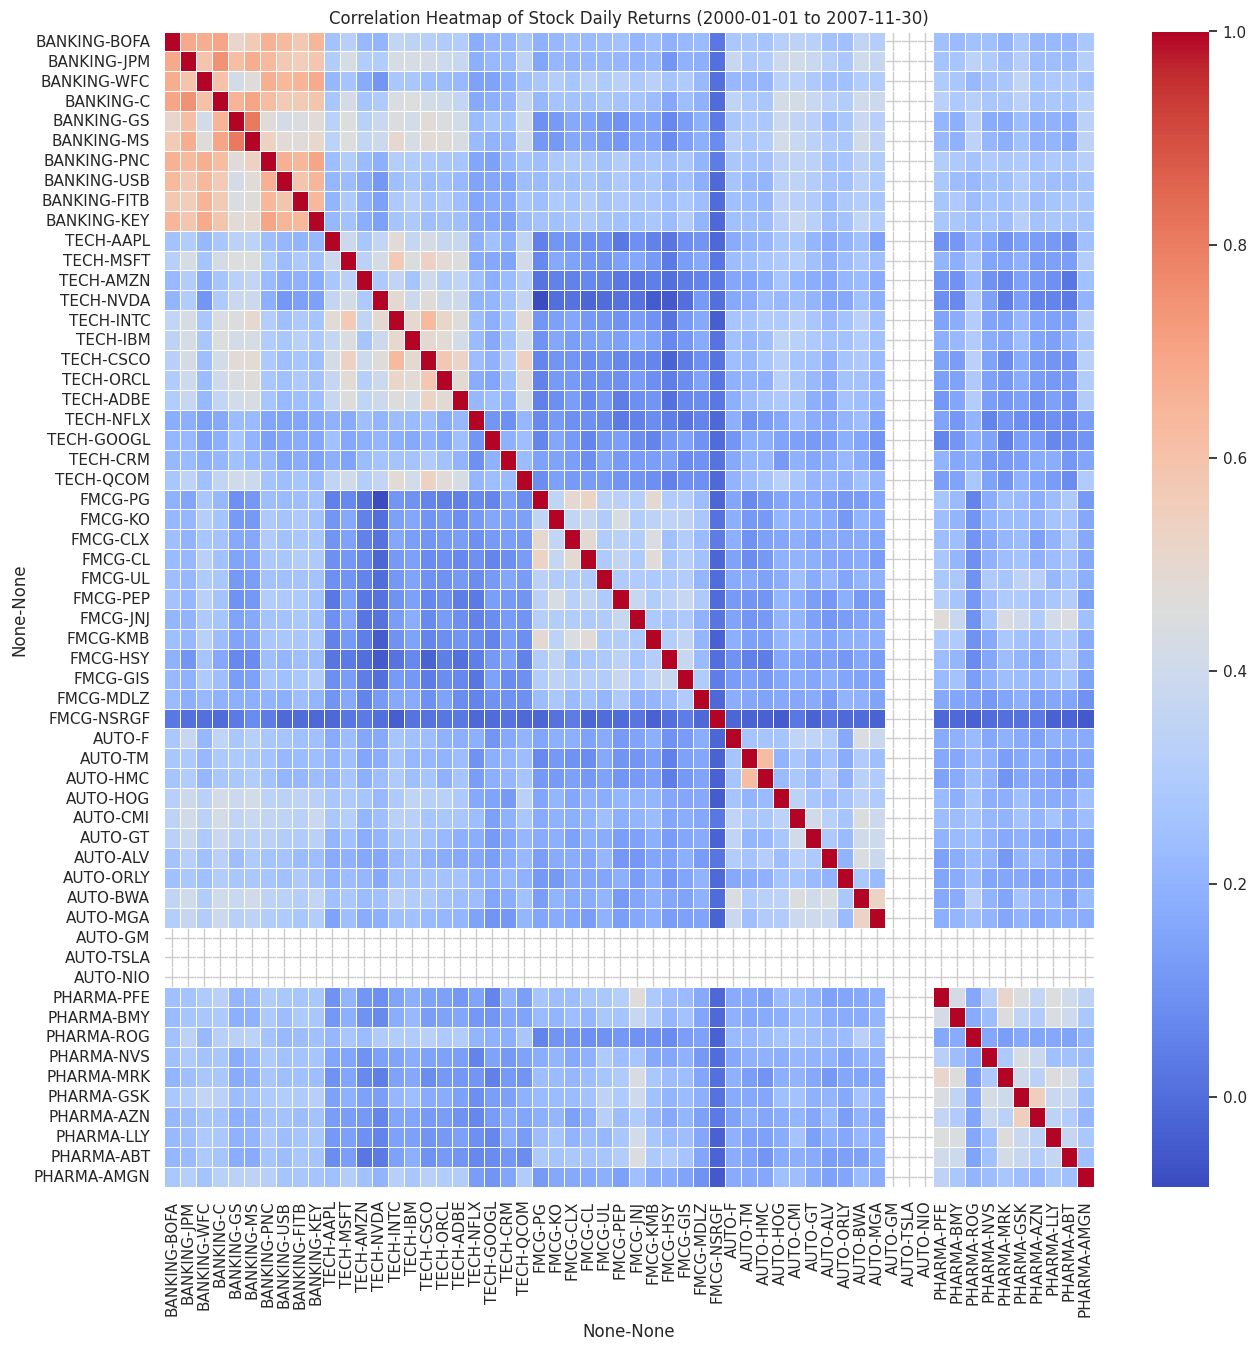

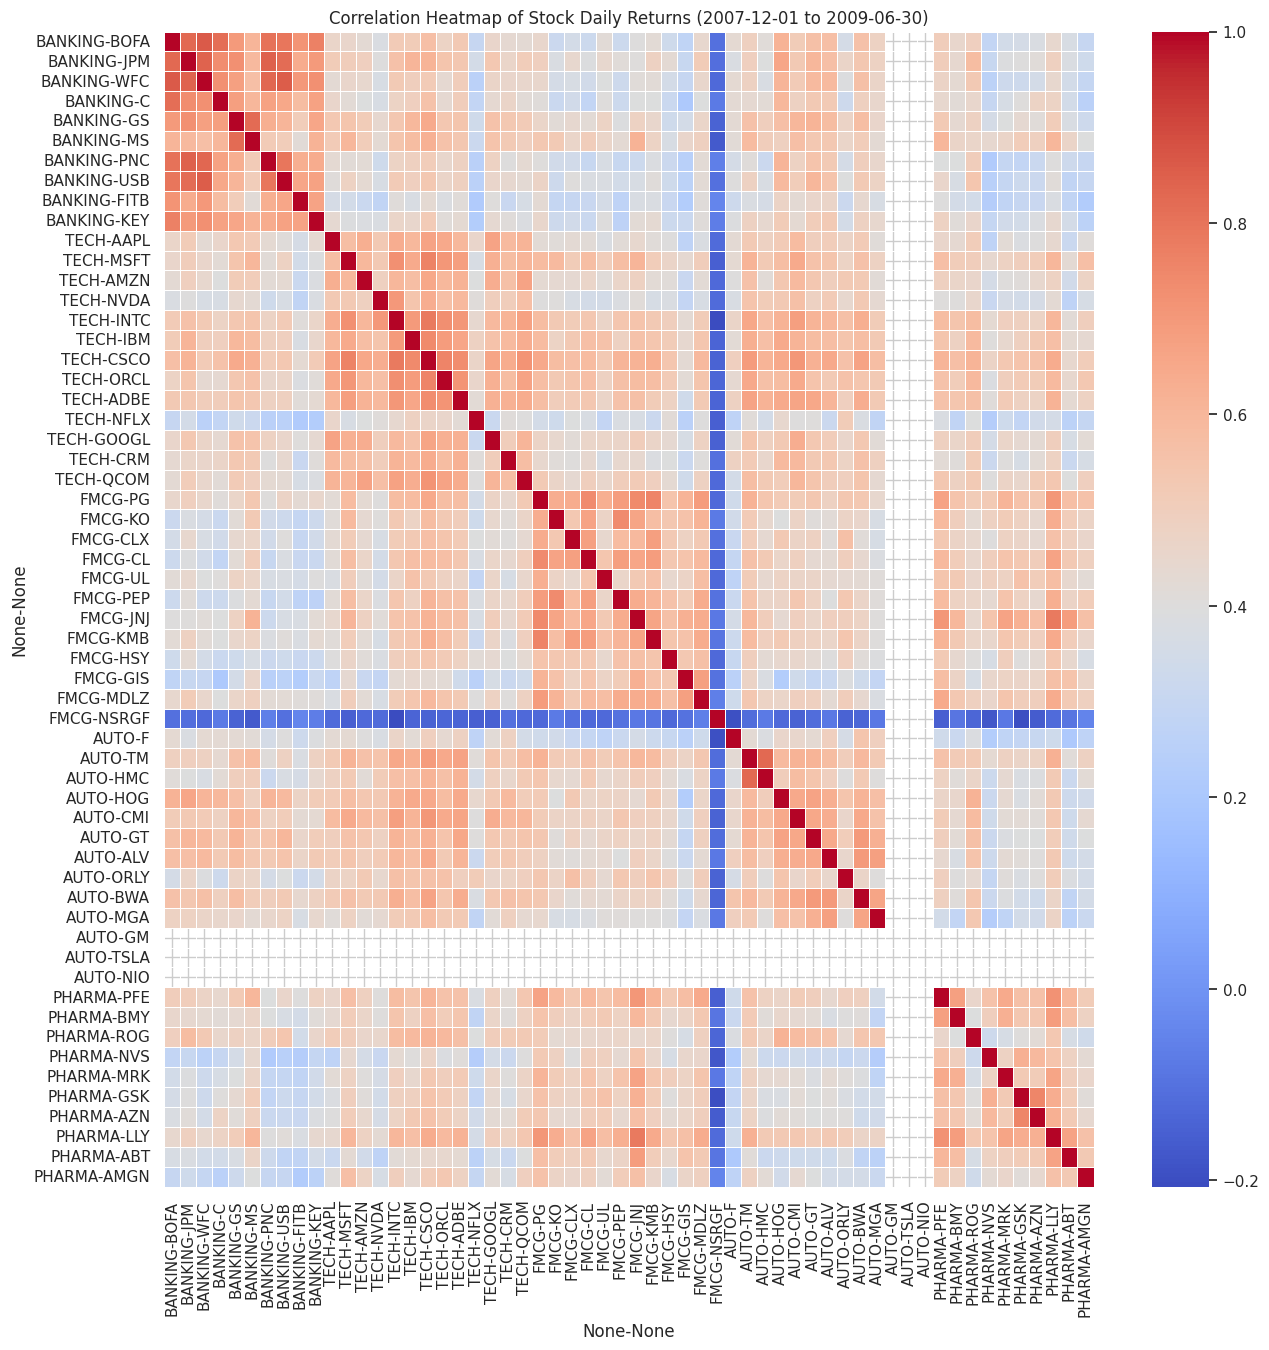

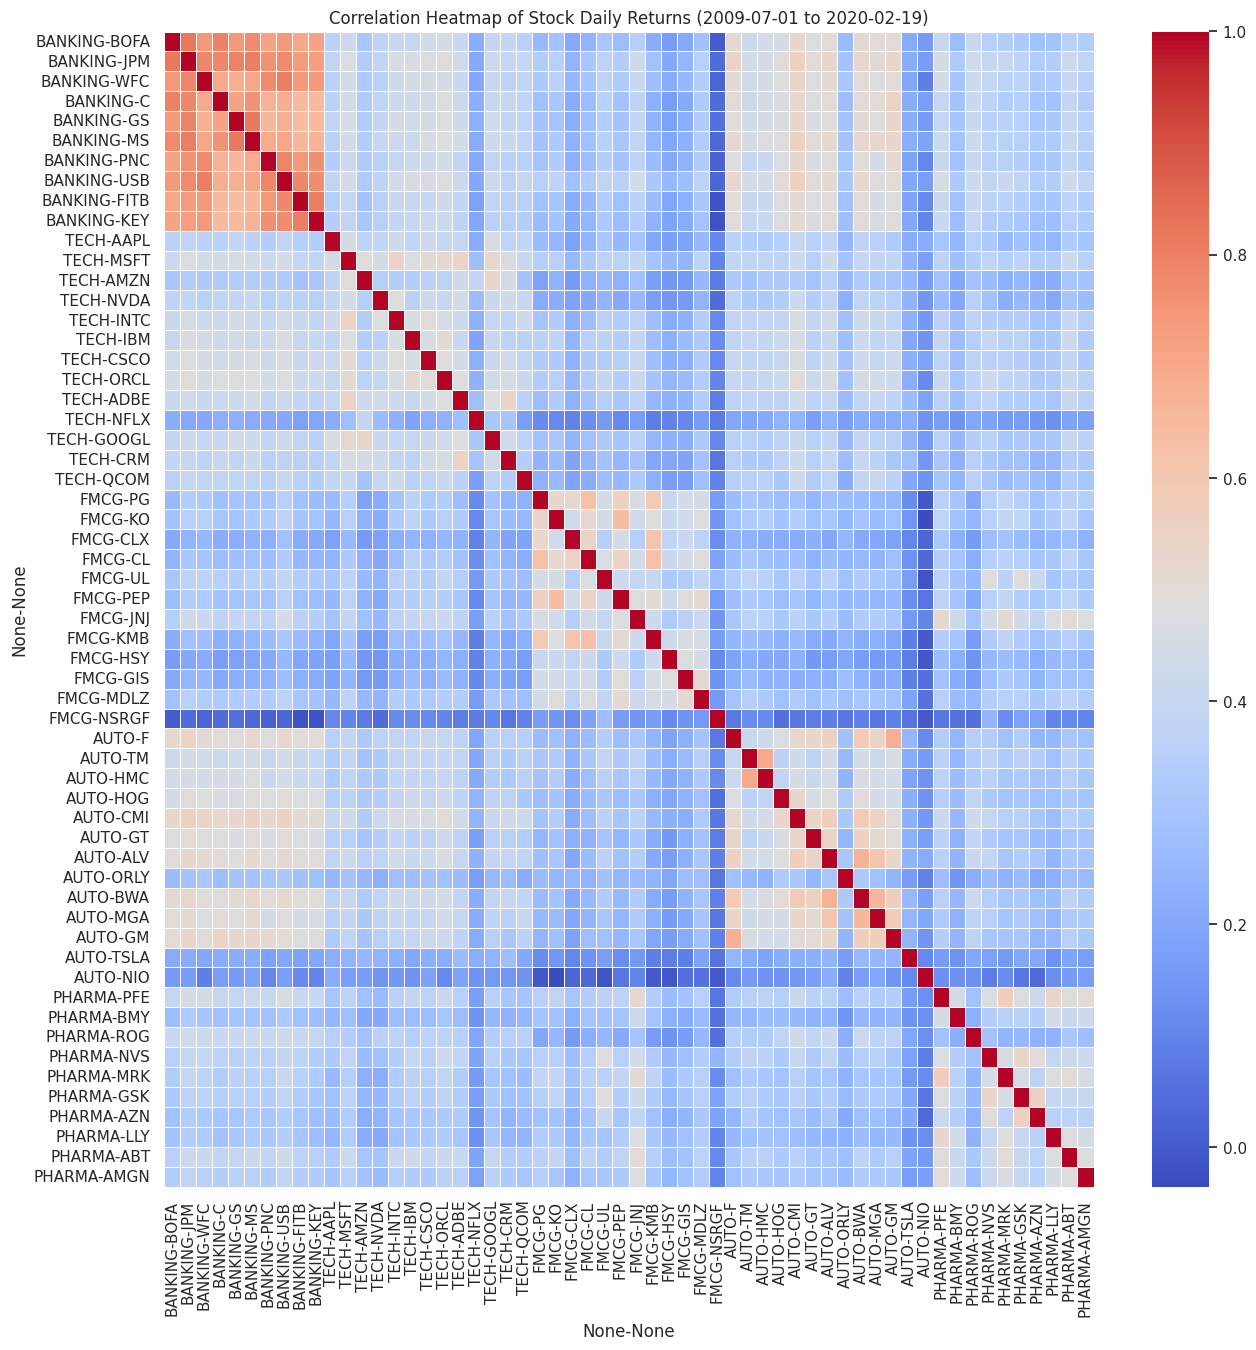

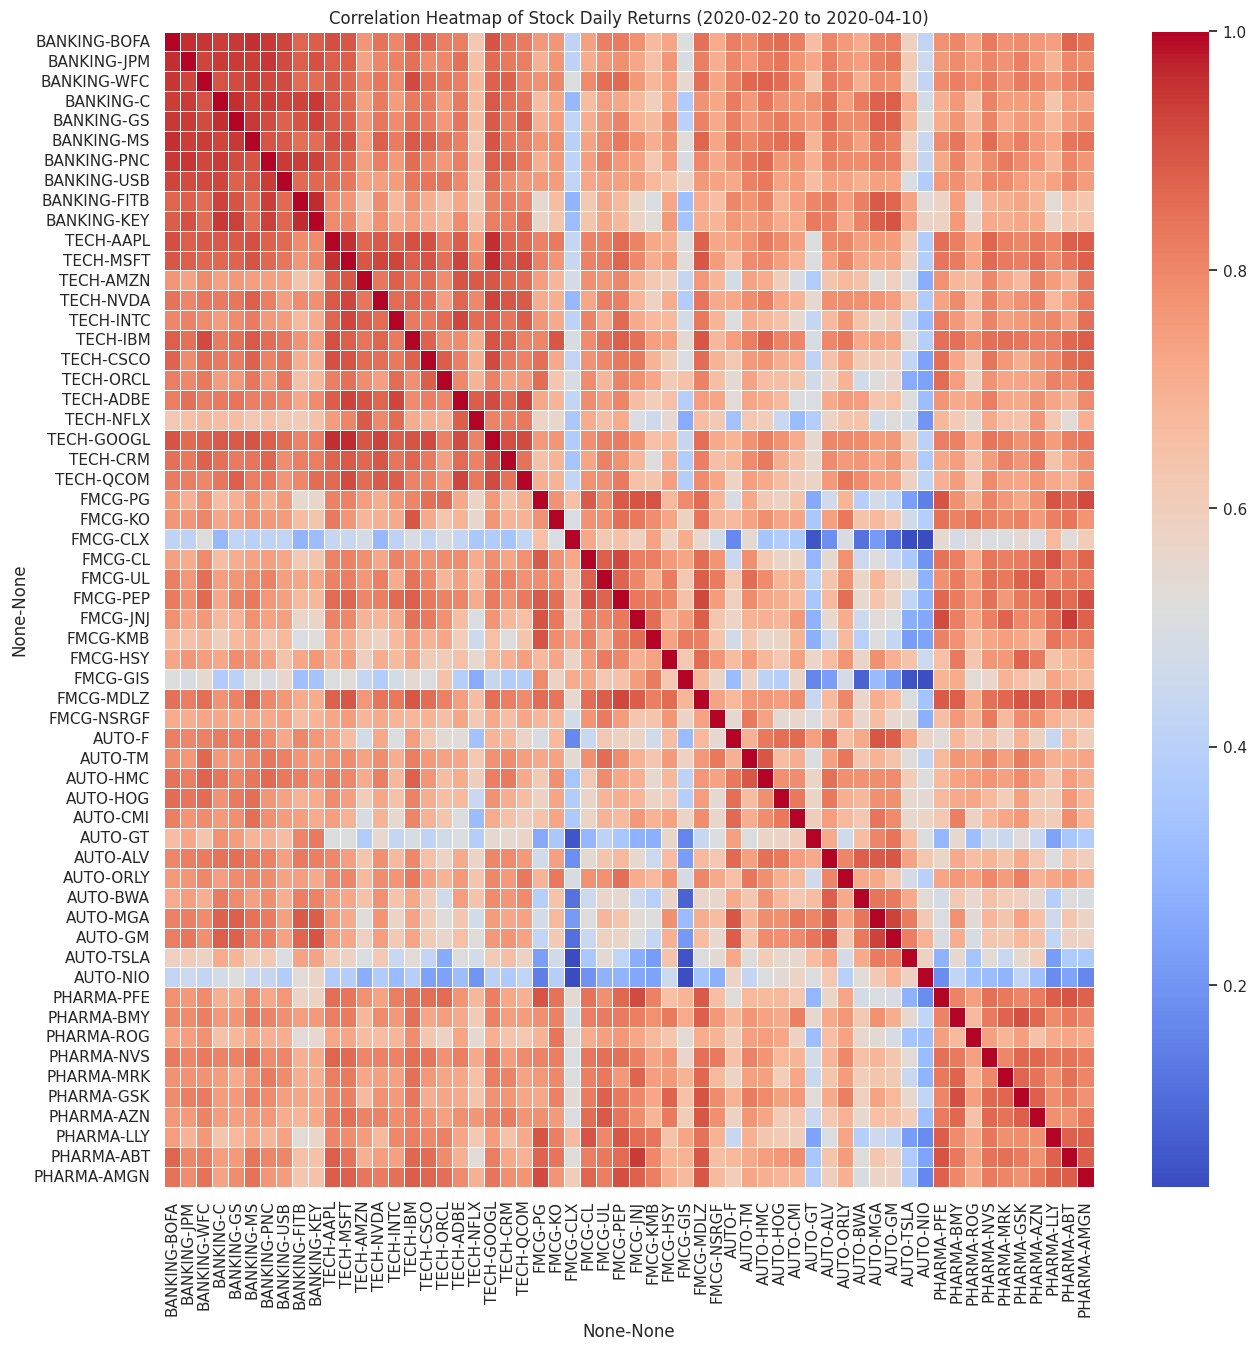

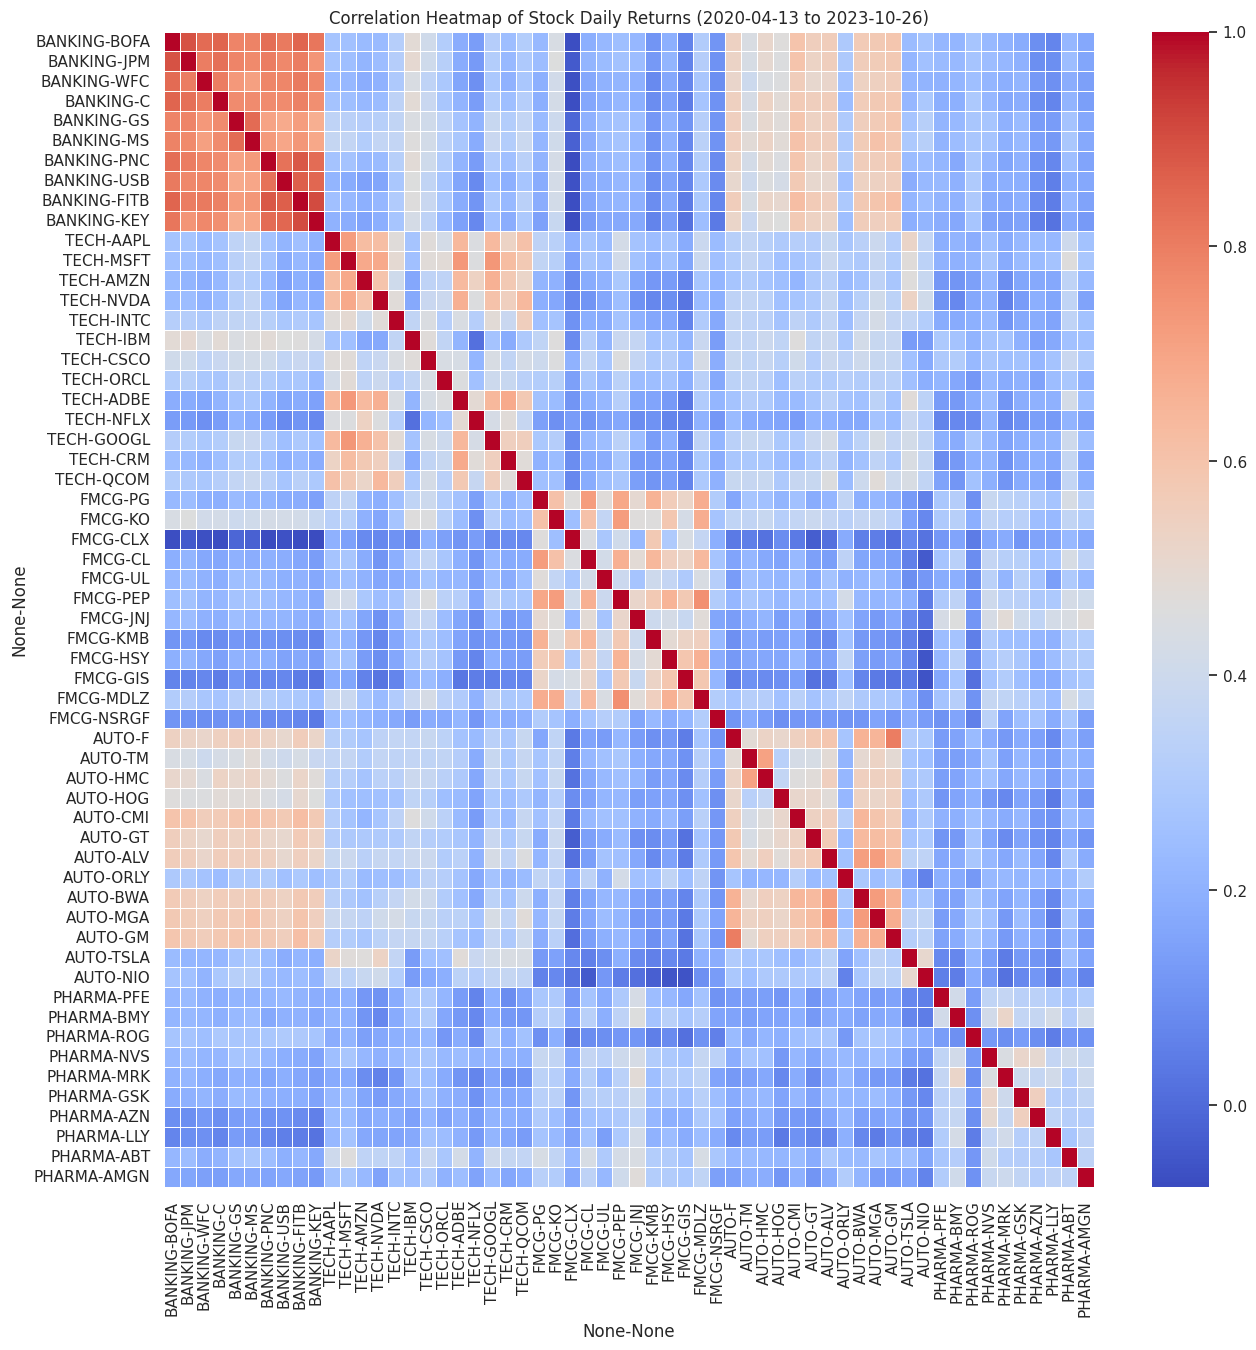

In [56]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

file_paths = [
    "BANKING SECTOR.xlsx",
    "TECH SECTOR.xlsx",
    "FMCG SECTOR.xlsx",
    "AUTO SECTOR.xlsx",
    "PHARMA SECTOR.xlsx"
]

dataframes = {}
for file_path in file_paths:
    sector_name = file_path.split('/')[-1].split(' ')[0]
    df = pd.read_excel(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(ascending=True, inplace=True)
    dataframes[sector_name] = df

combined_df = pd.concat(dataframes.values(), axis=1, keys=dataframes.keys())

daily_returns = combined_df.pct_change()

covid_impact_daily_returns = combined_df.loc['2000-01-01':'2007-11-30'].pct_change()
covid_impact_correlation_matrix = covid_impact_daily_returns.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(covid_impact_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Stock Daily Returns (2000-01-01 to 2007-11-30)")
plt.show()

covid_impact_daily_returns = combined_df.loc['2007-12-01':'2009-06-30'].pct_change()
covid_impact_correlation_matrix = covid_impact_daily_returns.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(covid_impact_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Stock Daily Returns (2007-12-01 to 2009-06-30)")
plt.show()

covid_impact_daily_returns = combined_df.loc['2009-07-01':'2020-02-19'].pct_change()
covid_impact_correlation_matrix = covid_impact_daily_returns.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(covid_impact_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Stock Daily Returns (2009-07-01 to 2020-02-19)")
plt.show()

covid_impact_daily_returns = combined_df.loc['2020-02-20':'2020-04-10'].pct_change()
covid_impact_correlation_matrix = covid_impact_daily_returns.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(covid_impact_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Stock Daily Returns (2020-02-20 to 2020-04-10)")
plt.show()

covid_impact_daily_returns = combined_df.loc['2020-04-13':'2023-10-26'].pct_change()
covid_impact_correlation_matrix = covid_impact_daily_returns.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(covid_impact_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Stock Daily Returns (2020-04-13 to 2023-10-26)")
plt.show()


Network Analysis

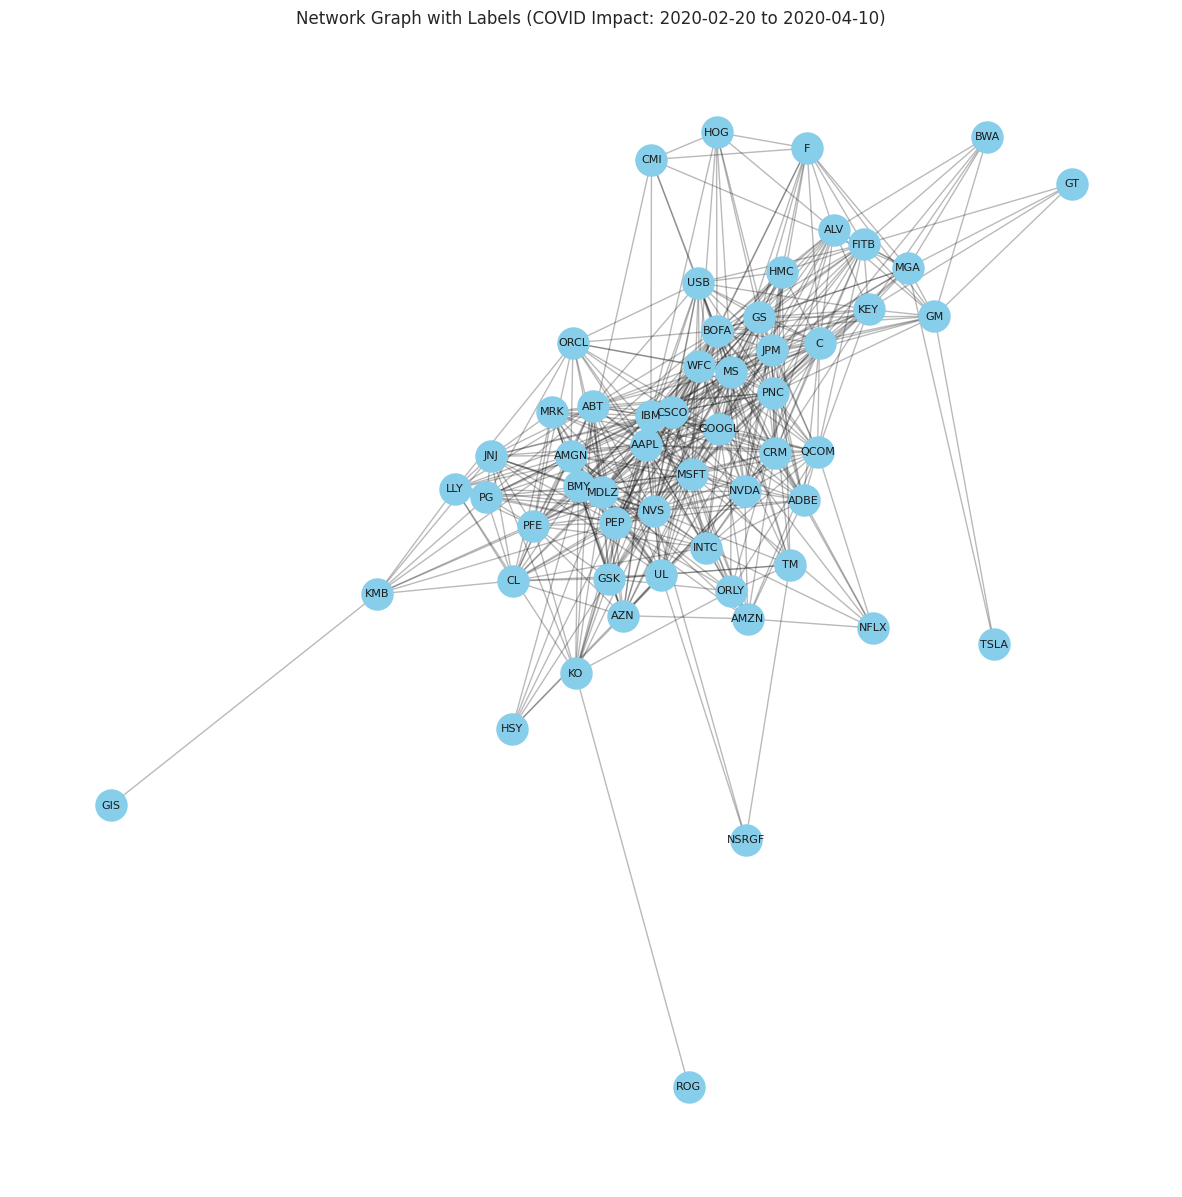

In [57]:
def plot_correlation_network_with_labels(correlation_matrix, threshold=0.5, title=""):
    G = nx.Graph()
    for col in correlation_matrix.columns:
        for idx in correlation_matrix.index:
            if correlation_matrix.loc[idx, col] > threshold and idx != col:
                G.add_edge(idx[1], col[1], weight=correlation_matrix.loc[idx, col])
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    plt.figure(figsize=(15, 15))
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(title)
    plt.axis('off')
    plt.show()
covid_impact_daily_returns = combined_df.loc['2020-02-20':'2020-04-10'].pct_change()
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(covid_impact_daily_returns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
covid_impact_correlation_matrix = pd.DataFrame(data_scaled, index=covid_impact_daily_returns.index,
                                               columns=covid_impact_daily_returns.columns).corr()

plot_correlation_network_with_labels(covid_impact_correlation_matrix, threshold=0.8,
                                     title="Network Graph with Labels (COVID Impact: 2020-02-20 to 2020-04-10)")

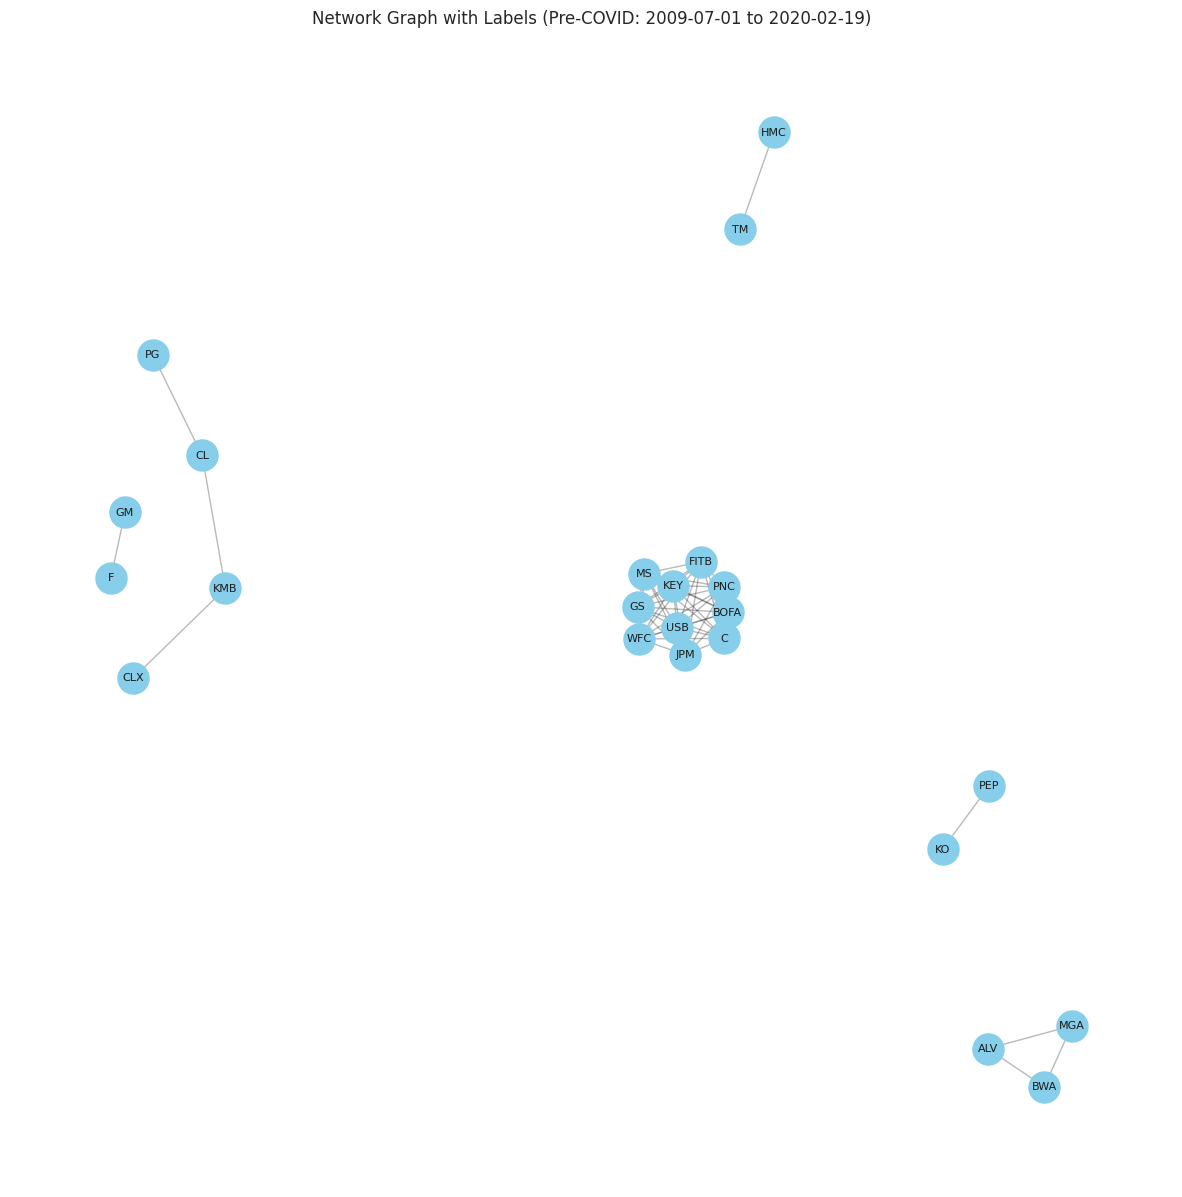

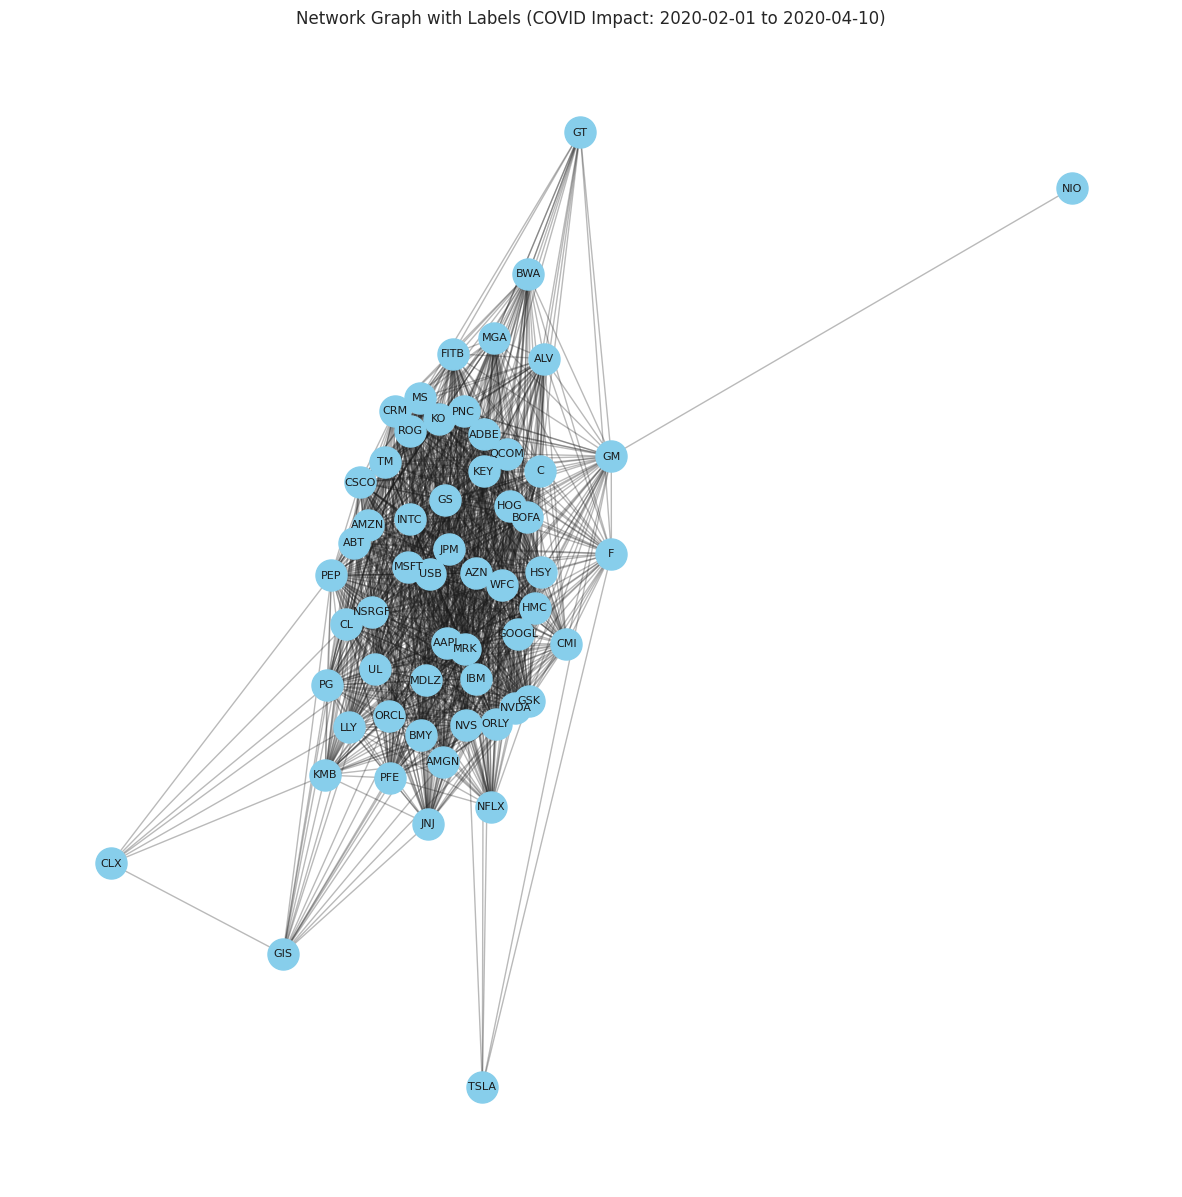

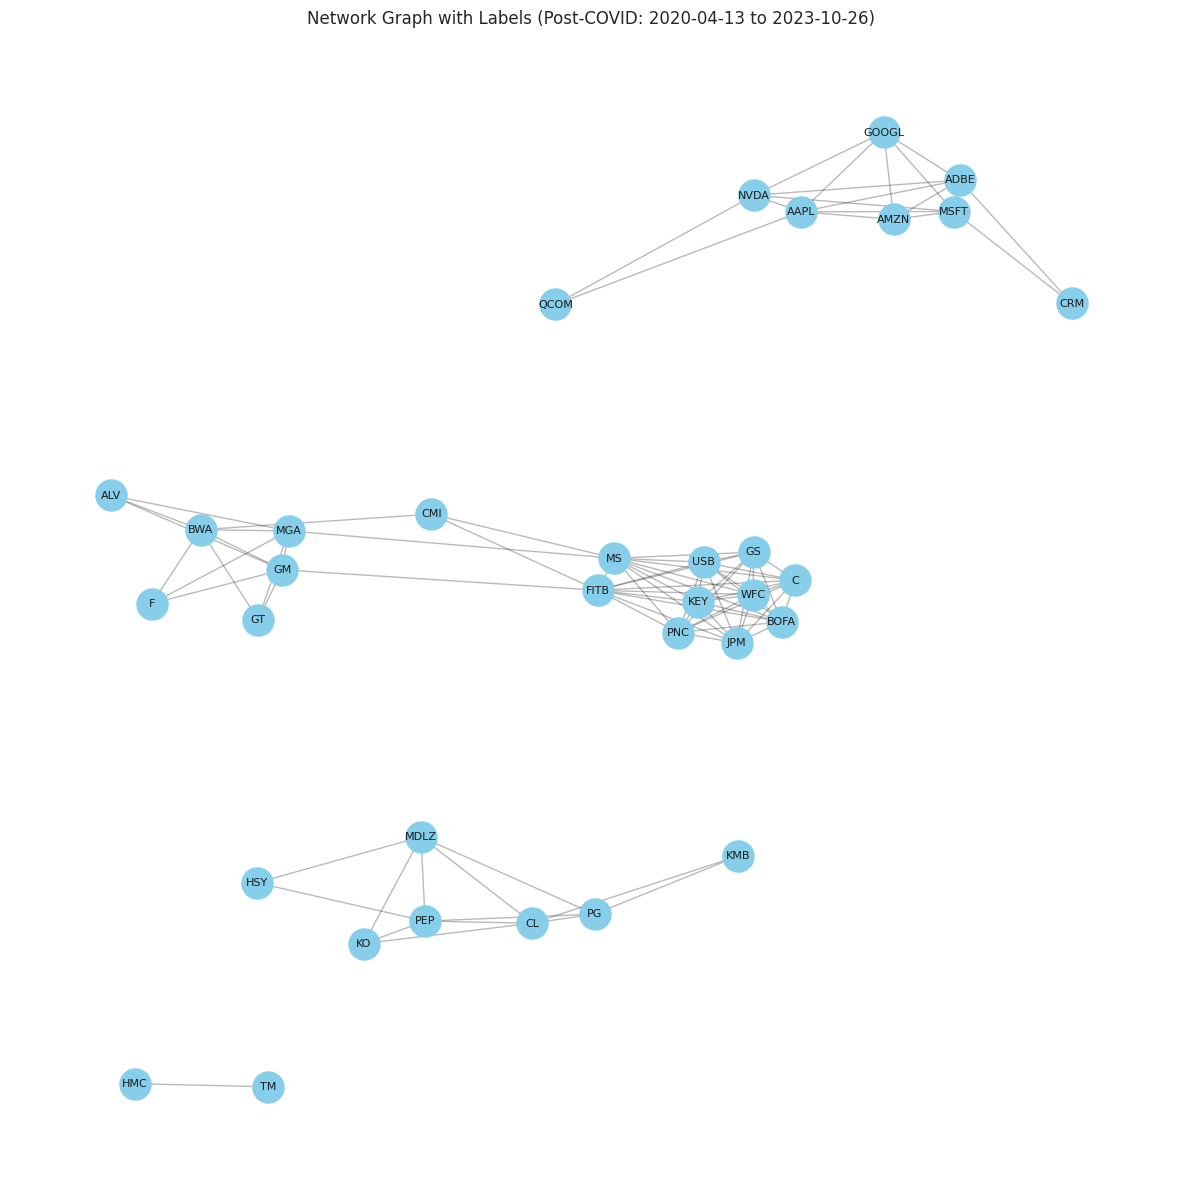

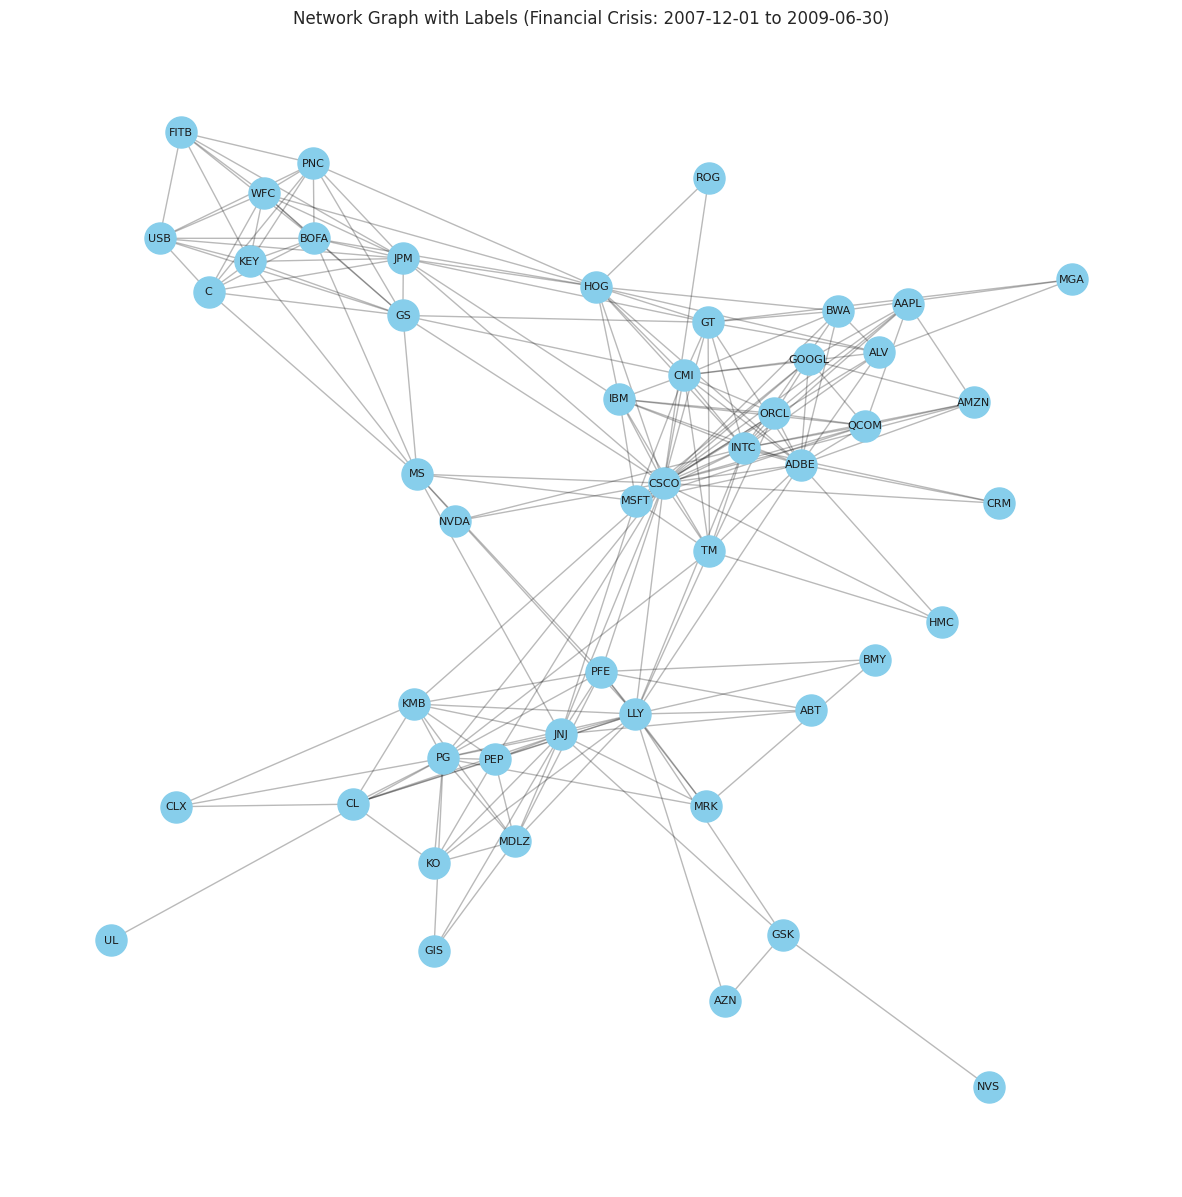

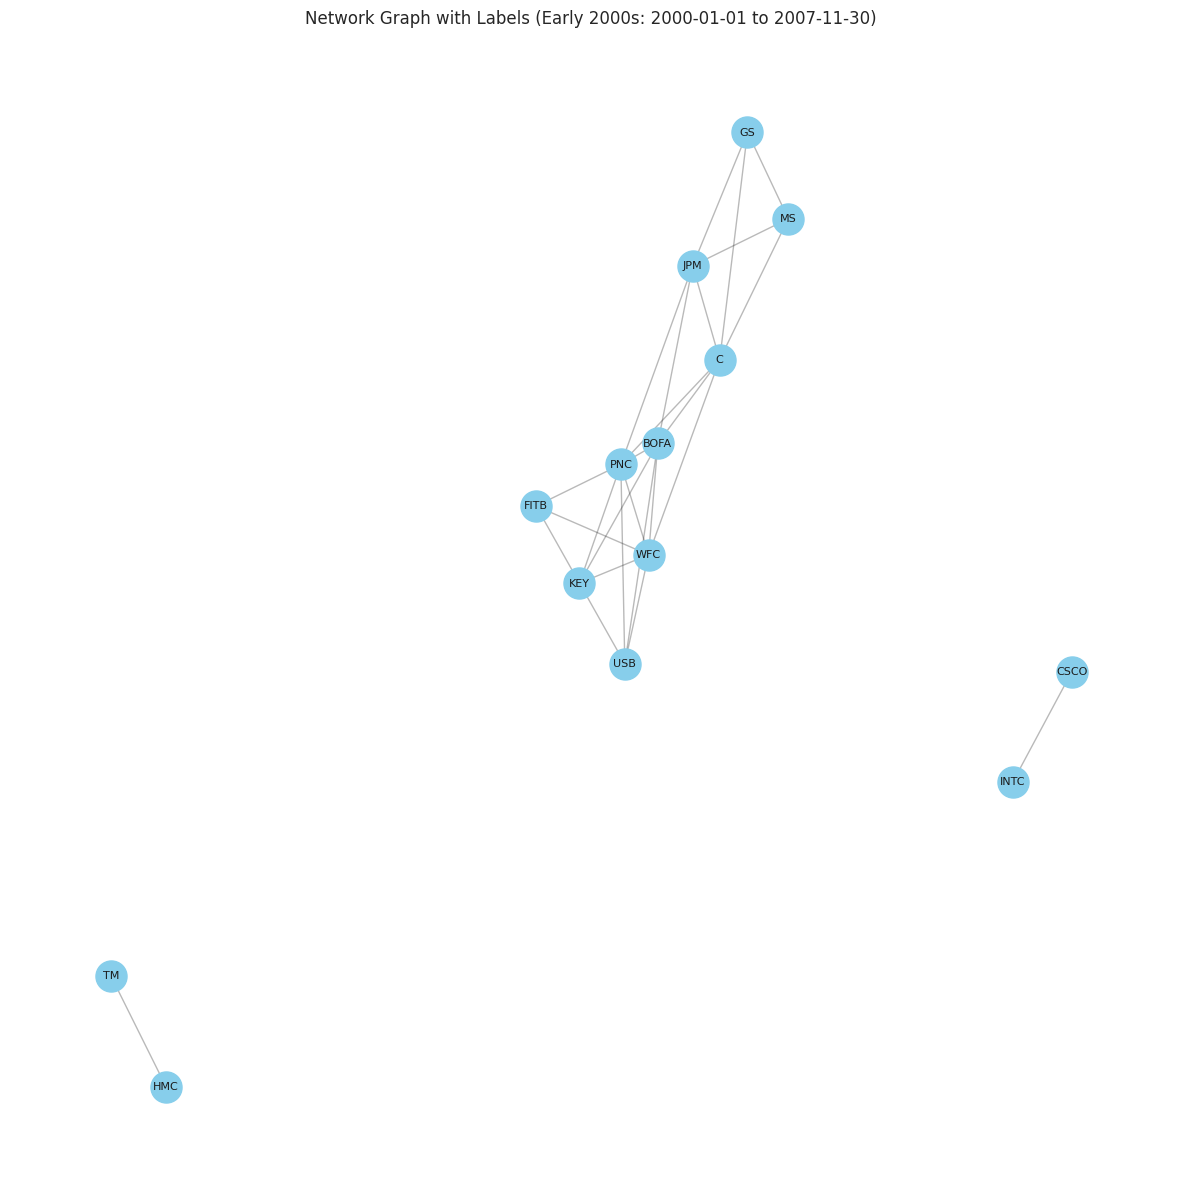

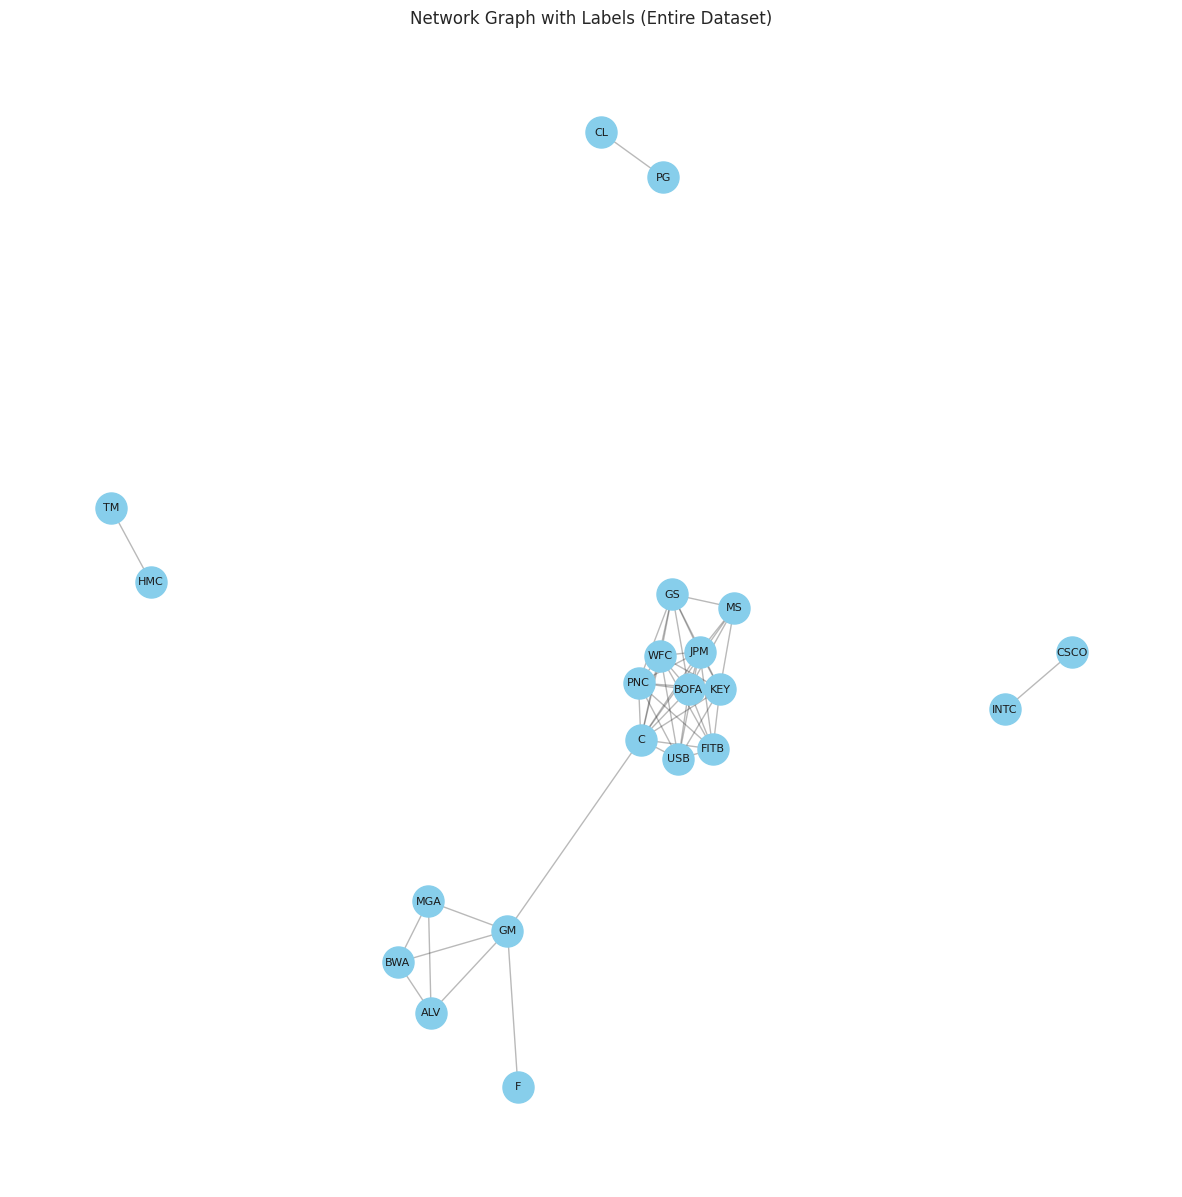

In [58]:
#Treshold = 0.6
period_daily_returns = daily_returns.loc['2009-07-01':'2020-02-19']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.6, title='Network Graph with Labels (Pre-COVID: 2009-07-01 to 2020-02-19)')

period_daily_returns = daily_returns.loc['2020-02-01':'2020-04-10']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.6, title='Network Graph with Labels (COVID Impact: 2020-02-01 to 2020-04-10)')

period_daily_returns = daily_returns.loc['2020-04-13':'2023-10-26']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.6, title='Network Graph with Labels (Post-COVID: 2020-04-13 to 2023-10-26)')

period_daily_returns = daily_returns.loc['2007-12-01':'2009-06-30']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.6, title='Network Graph with Labels (Financial Crisis: 2007-12-01 to 2009-06-30)')

period_daily_returns = daily_returns.loc['2000-01-01':'2007-11-30']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.6, title='Network Graph with Labels (Early 2000s: 2000-01-01 to 2007-11-30)')

period_daily_returns = daily_returns
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.6, title='Network Graph with Labels (Entire Dataset)')

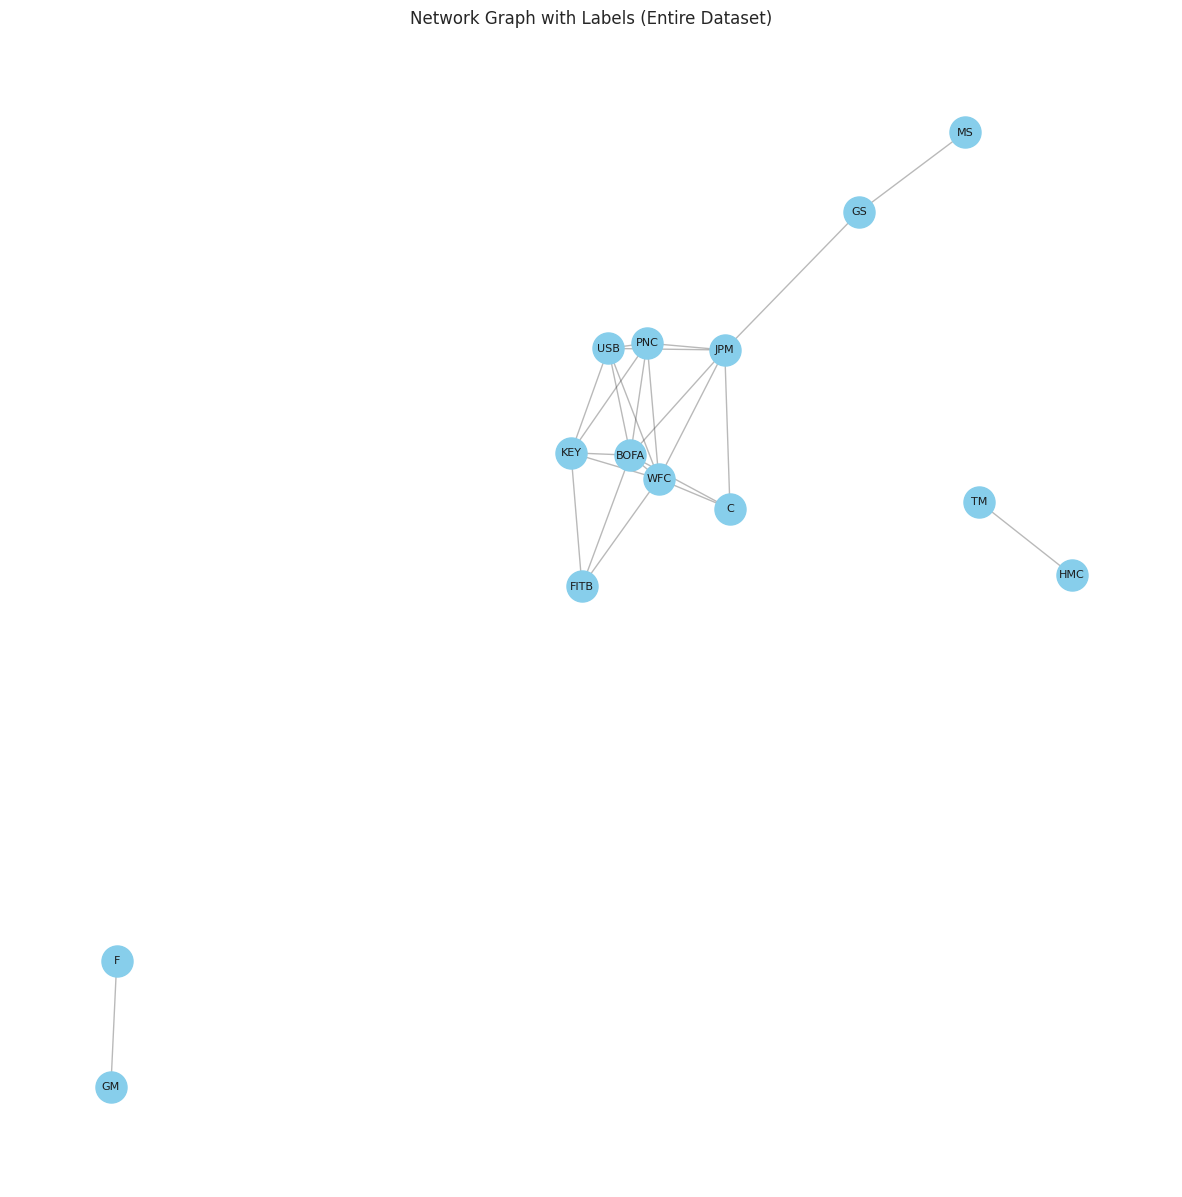

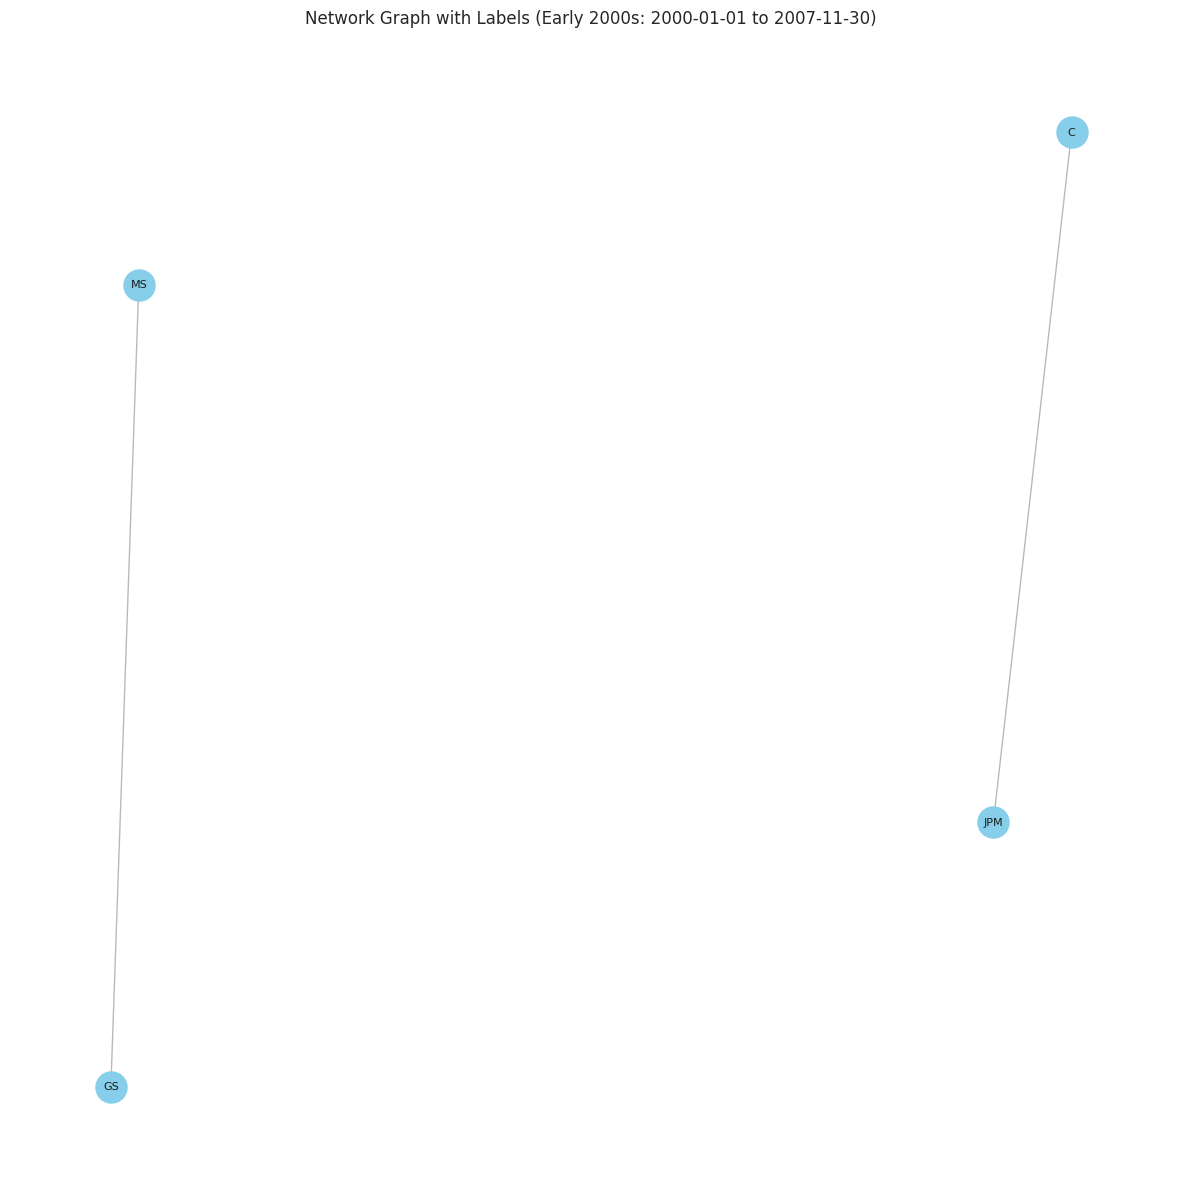

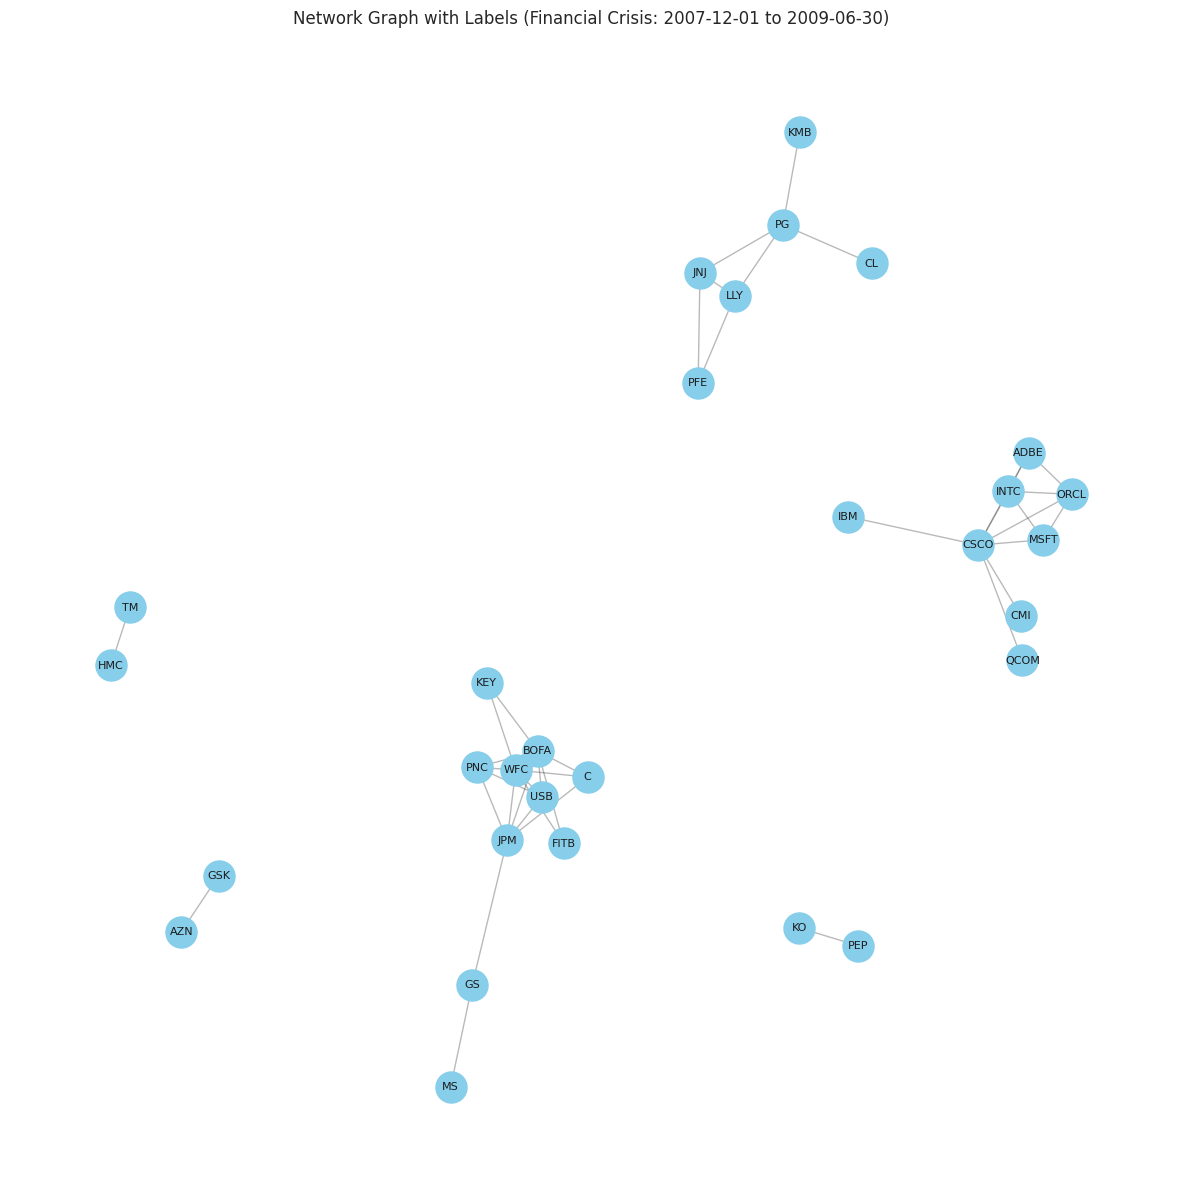

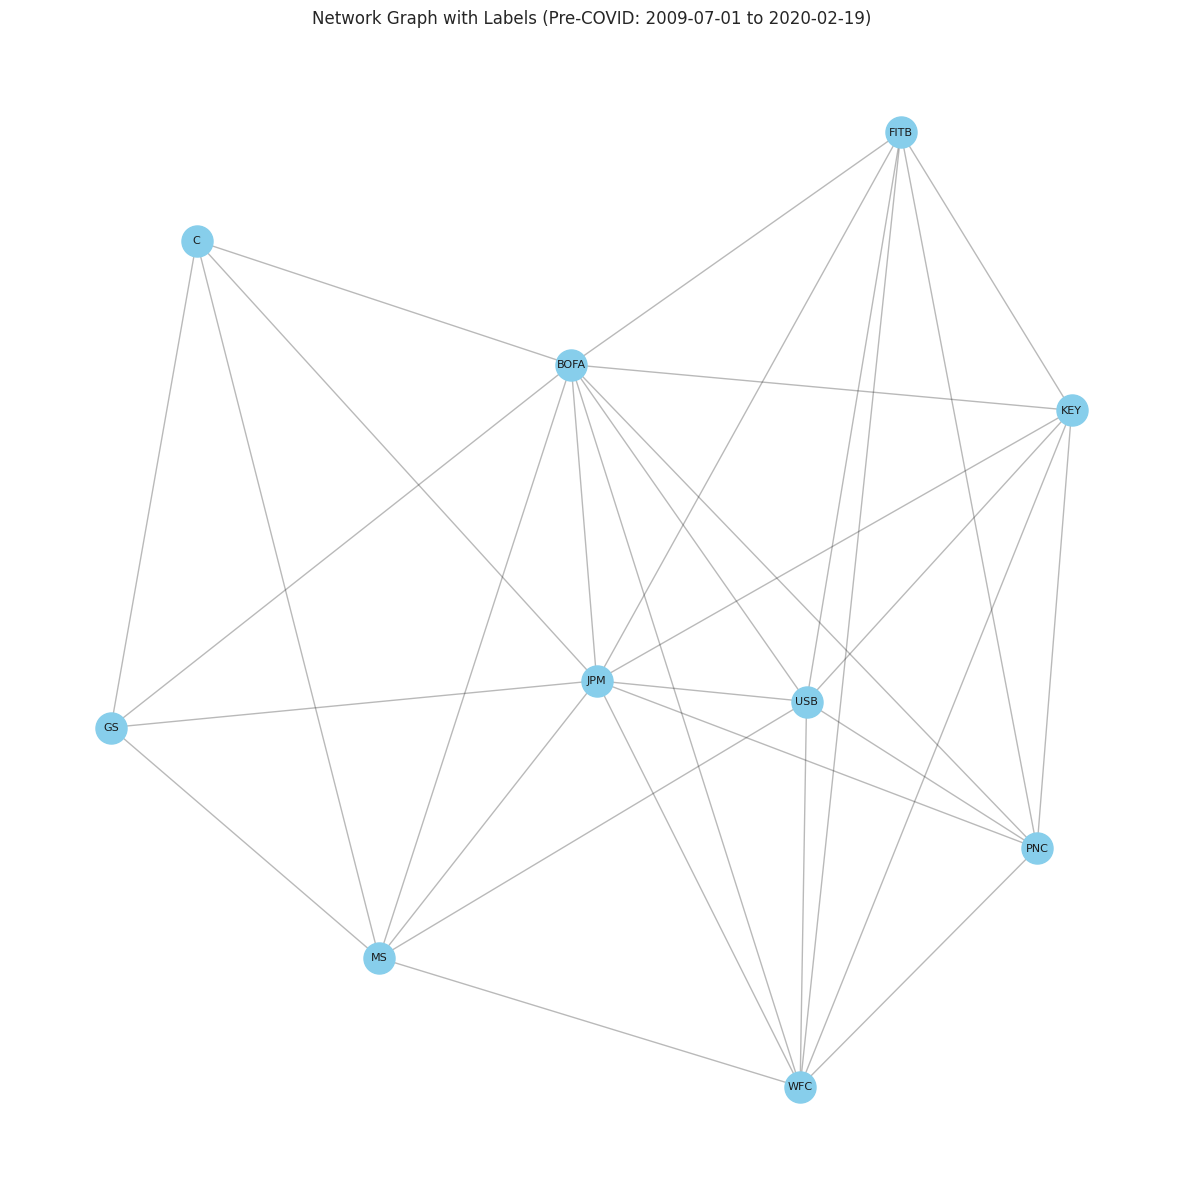

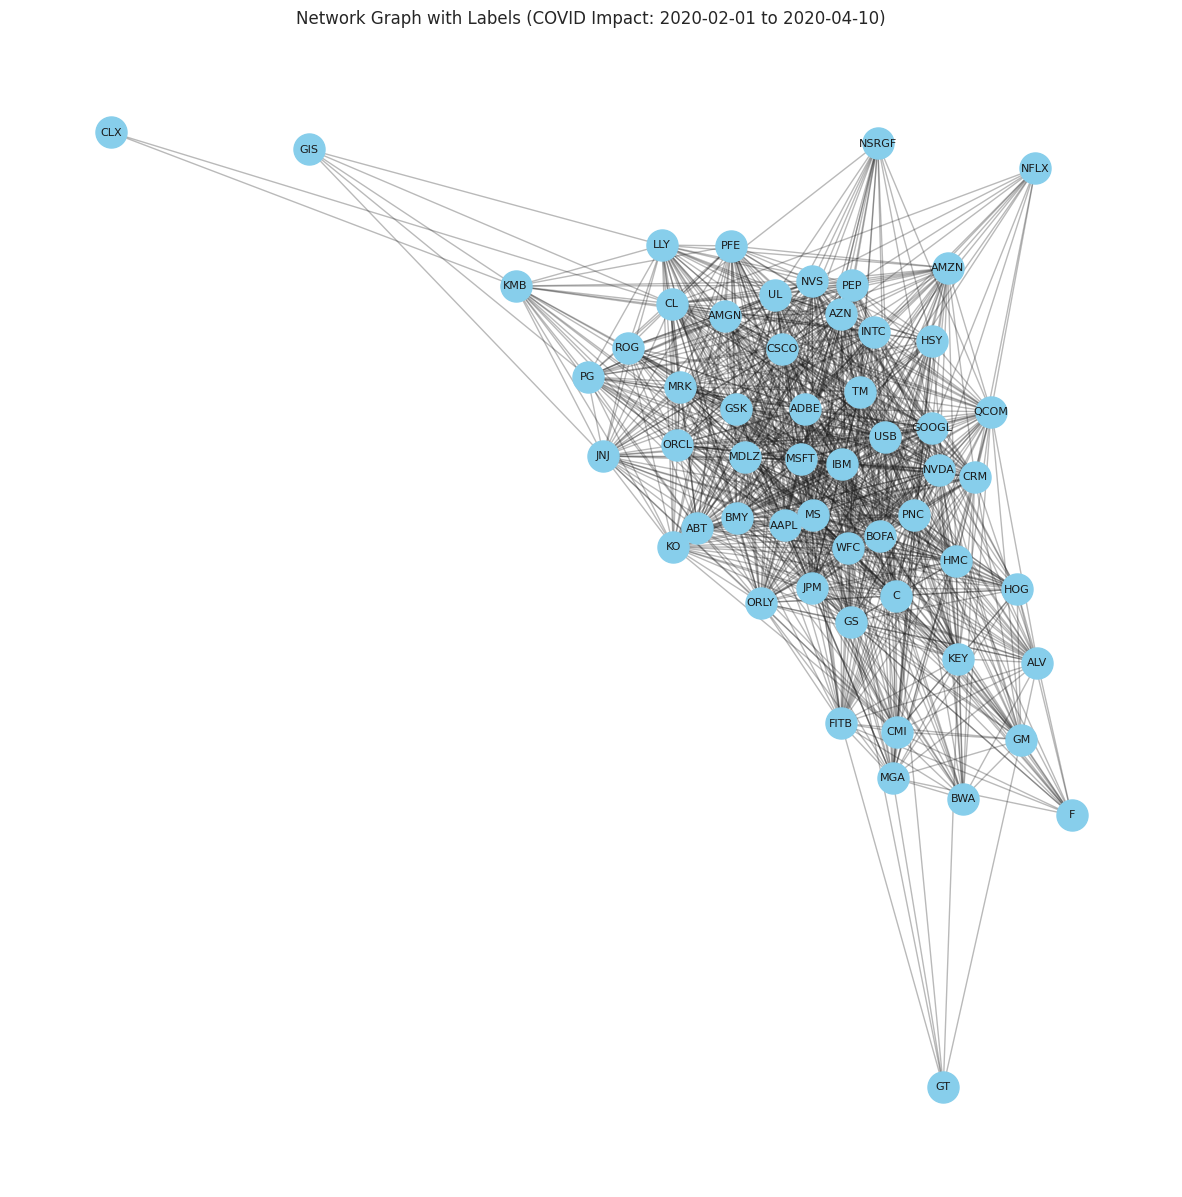

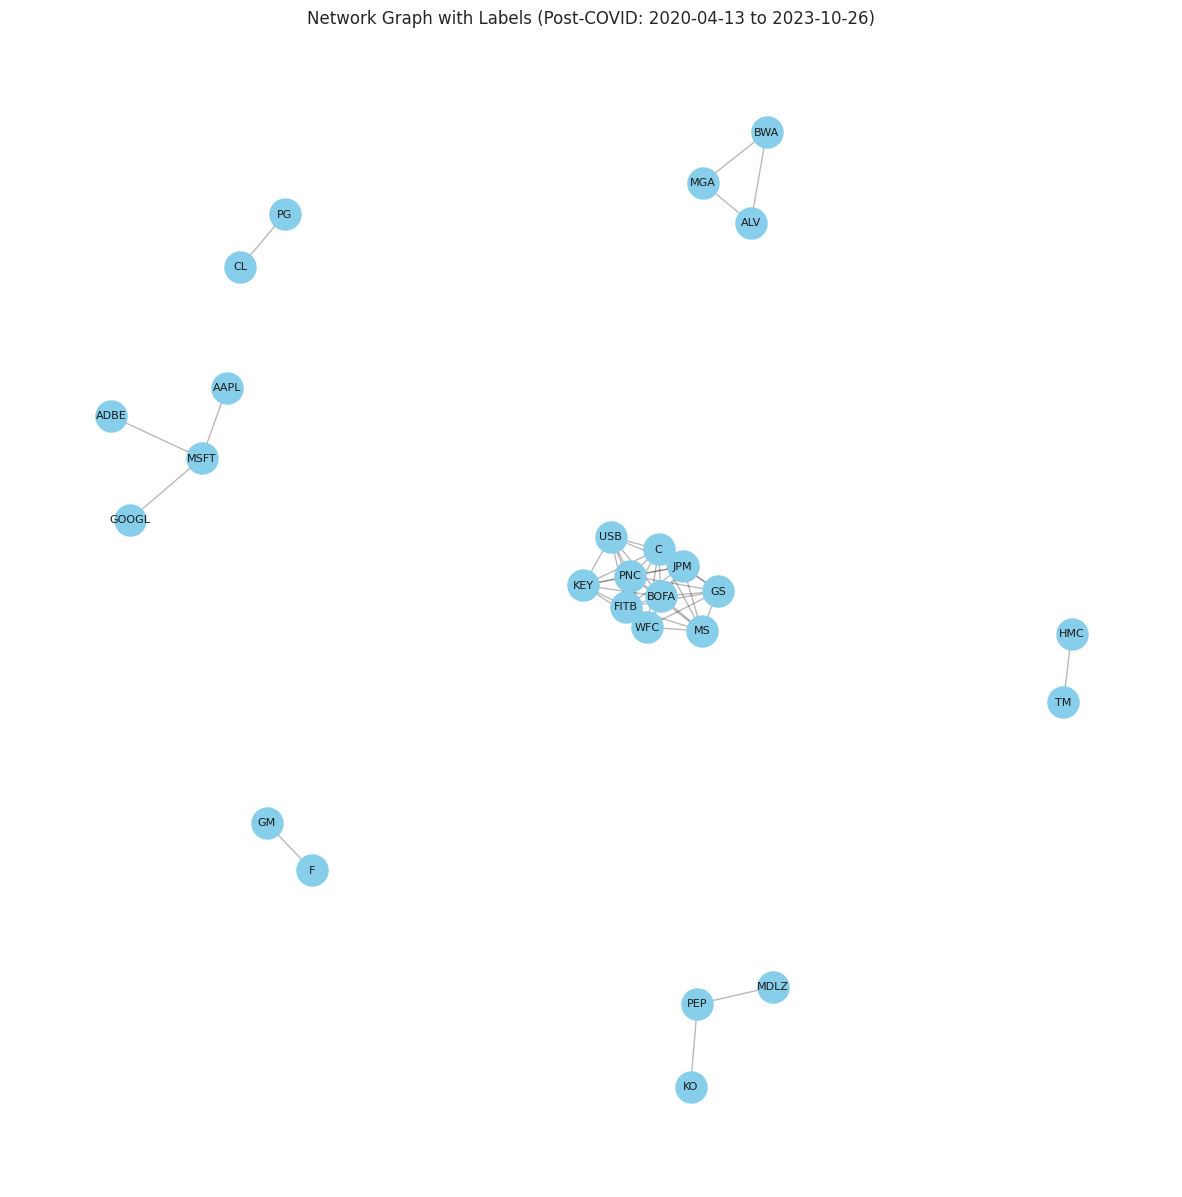

In [59]:
#Treshold = 0.7
period_daily_returns = daily_returns
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.7, title='Network Graph with Labels (Entire Dataset)')

period_daily_returns = daily_returns.loc['2000-01-01':'2007-11-30']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.7, title='Network Graph with Labels (Early 2000s: 2000-01-01 to 2007-11-30)')

period_daily_returns = daily_returns.loc['2007-12-01':'2009-06-30']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.7, title='Network Graph with Labels (Financial Crisis: 2007-12-01 to 2009-06-30)')

period_daily_returns = daily_returns.loc['2009-07-01':'2020-02-19']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.7, title='Network Graph with Labels (Pre-COVID: 2009-07-01 to 2020-02-19)')

period_daily_returns = daily_returns.loc['2020-02-01':'2020-04-10']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.7, title='Network Graph with Labels (COVID Impact: 2020-02-01 to 2020-04-10)')

period_daily_returns = daily_returns.loc['2020-04-13':'2023-10-26']
period_correlation_matrix = period_daily_returns.corr()
plot_correlation_network_with_labels(period_correlation_matrix, threshold=0.7, title='Network Graph with Labels (Post-COVID: 2020-04-13 to 2023-10-26)')

Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

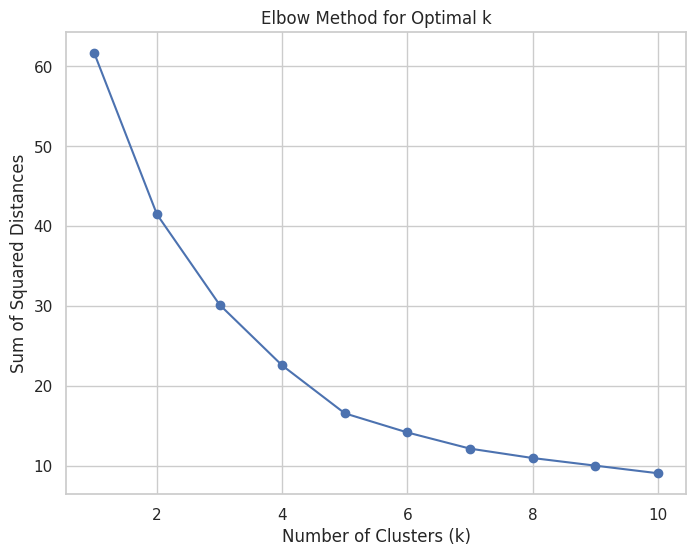

    Stock  Cluster
0    BOFA        3
1     JPM        3
2     WFC        3
3       C        3
4      GS        3
5      MS        3
6     PNC        3
7     USB        3
8    FITB        3
9     KEY        3
10   AAPL        3
11   MSFT        3
12   AMZN        1
13   NVDA        3
14   INTC        1
15    IBM        3
16   CSCO        1
17   ORCL        1
18   ADBE        3
19   NFLX        1
20  GOOGL        3
21    CRM        3
22   QCOM        3
23     PG        1
24     KO        1
25    CLX        2
26     CL        1
27     UL        1
28    PEP        1
29    JNJ        1
30    KMB        1
31    HSY        1
32    GIS        2
33   MDLZ        1
34  NSRGF        1
35      F        0
36     TM        1
37    HMC        3
38    HOG        3
39    CMI        3
40     GT        0
41    ALV        0
42   ORLY        1
43    BWA        0
44    MGA        0
45     GM        0
46   TSLA        0
47    NIO        0
48    PFE        1
49    BMY        1
50    ROG        1
51    NVS   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
import numpy as np

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(covid_impact_correlation_matrix)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

from sklearn.cluster import KMeans

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(covid_impact_correlation_matrix)
cluster_assignments = kmeans.labels_
correlation_matrix_columns = covid_impact_correlation_matrix.columns.droplevel()
clustered_df = pd.DataFrame({'Stock': correlation_matrix_columns, 'Cluster': cluster_assignments})
print(clustered_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

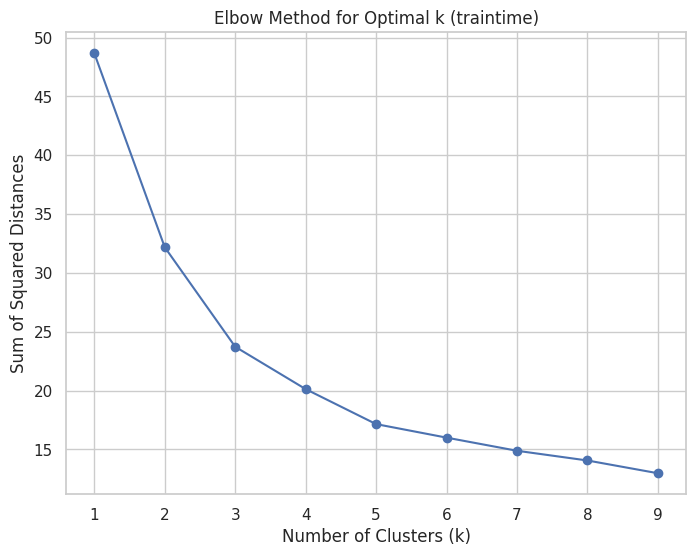

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

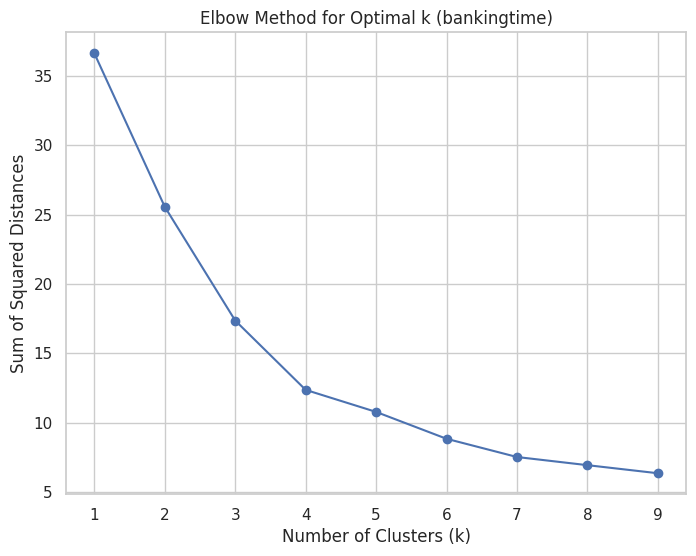

In [61]:
traintime = finaldfr.loc['2000-01-01':'2019-12-31']
bankingtime = finaldfr.loc['2020-02-20':'2020-04-10']

def plot_elbow_curve(data, title):
    inertia = []

    k_range = range(1, 10)

    calculate_inertia = lambda k: KMeans(n_clusters=k, random_state=0).fit(data).inertia_
    inertia = list(map(calculate_inertia, k_range))
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances')
    plt.title(title)
    plt.grid(True)
    plt.show()
correlation_matrix_traintime = traintime.corr()
correlation_matrix_bankingtime = bankingtime.corr()
plot_elbow_curve(correlation_matrix_traintime, 'Elbow Method for Optimal k (traintime)')
plot_elbow_curve(correlation_matrix_bankingtime, 'Elbow Method for Optimal k (bankingtime)')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Asset  Cluster
0    PFE        1
1    BMY        1
2    ROG        0
3    NVS        1
4    MRK        1
5    GSK        1
6    AZN        1
7    LLY        1
8    ABT        1
9   AMGN        1
10  AAPL        2
11  MSFT        2
12  AMZN        2
13  NVDA        2
14  INTC        2
15   IBM        2
16  CSCO        2
17  ORCL        2
18  ADBE        2
19  QCOM        2
20  BOFA        3
21   JPM        3
22   WFC        3
23     C        3
24    GS        3
25    MS        3
26   PNC        3
27   USB        3
28  FITB        3
29   KEY        3
30    PG        1
31    KO        1
32   CLX        1
33    CL        1
34    UL        1
35   PEP        1
36   JNJ        1
37   KMB        1
38   HSY        1
39   GIS        1
40     F        0
41    TM        0
42   HMC        0
43   HOG        0
44   CMI        0
45    GT        0
46   ALV        0
47  ORLY        0
48   BWA        0
49   MGA        0
Silhouette Score: 0.29968870615729676
Calinski Harabasz Score: 21.62030520313256
D

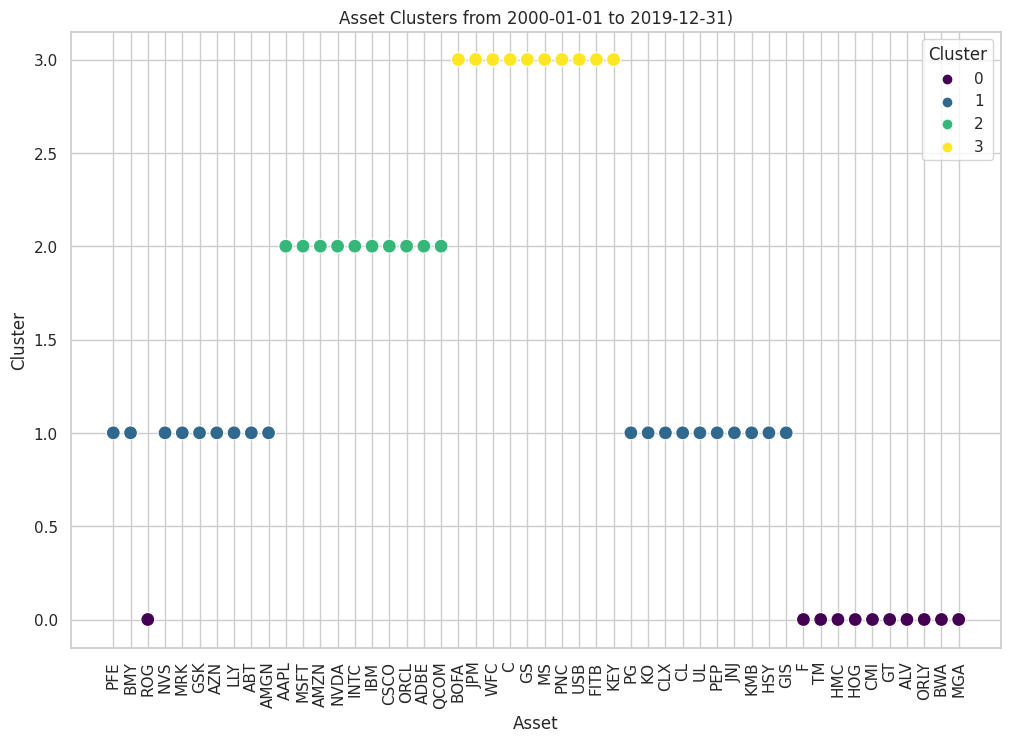

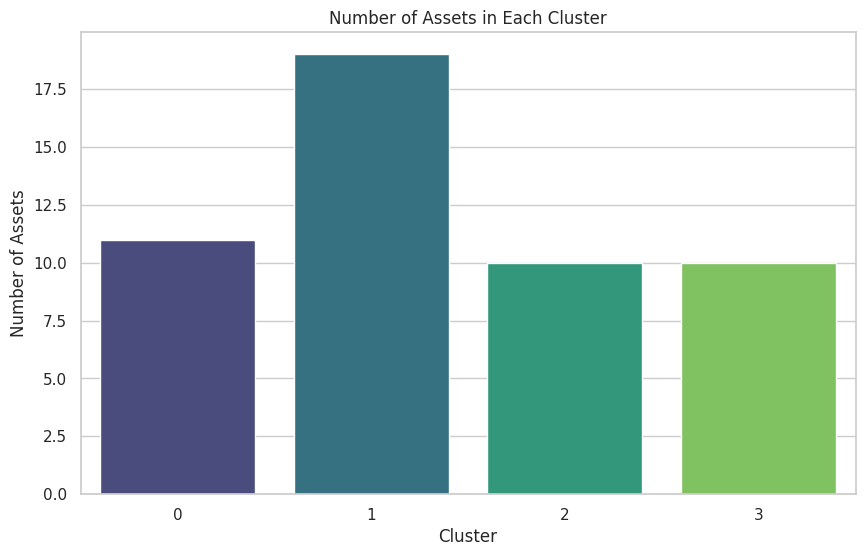

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Asset  Cluster
0    PFE        1
1    BMY        1
2    ROG        1
3    NVS        1
4    MRK        1
5    GSK        1
6    AZN        1
7    LLY        1
8    ABT        1
9   AMGN        1
10  AAPL        0
11  MSFT        0
12  AMZN        1
13  NVDA        0
14  INTC        1
15   IBM        0
16  CSCO        1
17  ORCL        1
18  ADBE        0
19  QCOM        0
20  BOFA        0
21   JPM        0
22   WFC        0
23     C        0
24    GS        0
25    MS        0
26   PNC        0
27   USB        0
28  FITB        0
29   KEY        0
30    PG        1
31    KO        1
32   CLX        1
33    CL        1
34    UL        1
35   PEP        1
36   JNJ        1
37   KMB        1
38   HSY        1
39   GIS        1
40     F        0
41    TM        0
42   HMC        0
43   HOG        0
44   CMI        0
45    GT        0
46   ALV        0
47  ORLY        0
48   BWA        0
49   MGA        0
Silhouette Score: 0.2730690464668507
Calinski Harabasz Score: 20.789910056747622
D

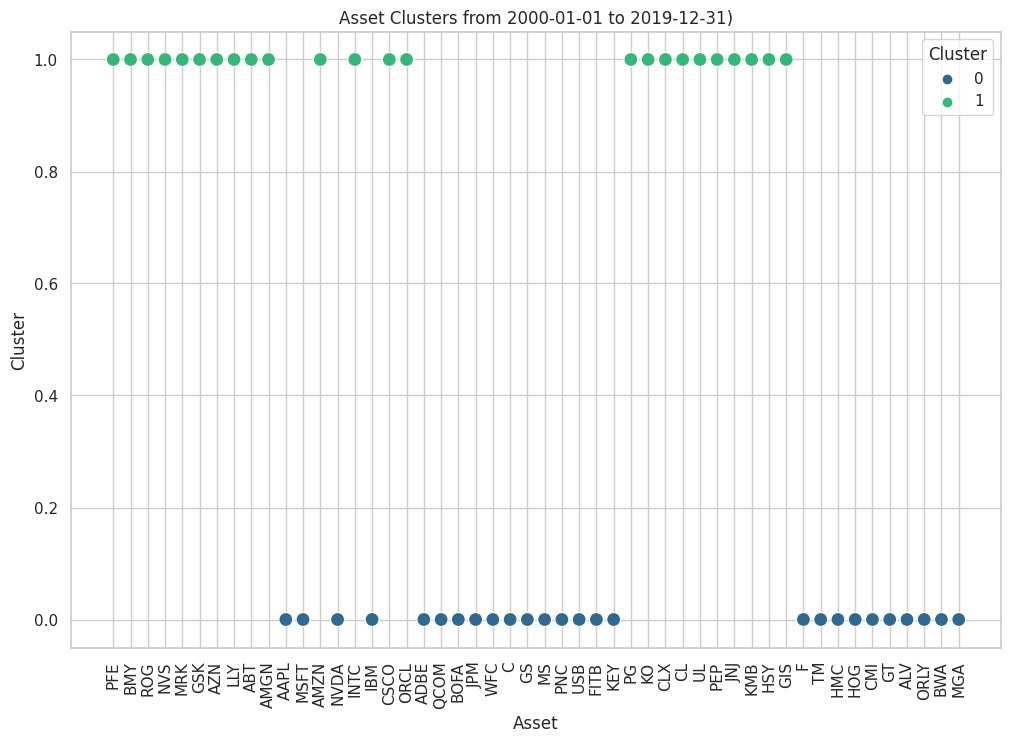

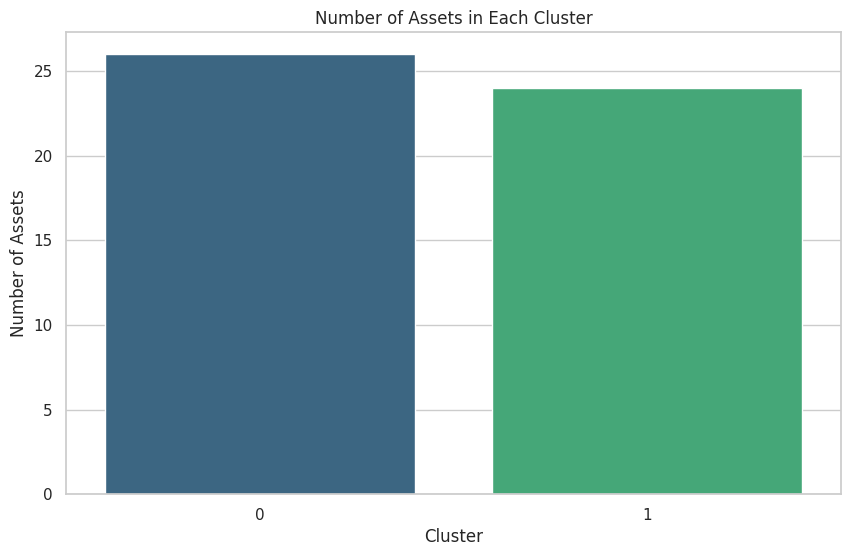

In [62]:
# Entire period
#K Means

correlation_matrix = traintime.corr()
X = np.array(correlation_matrix)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
cluster_labels = kmeans.labels_
your_asset_list = traintime.columns.tolist()
assets_df = pd.DataFrame({'Asset': your_asset_list, 'Cluster': cluster_labels})
print(assets_df)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski Harabasz Score: {ch_score}")
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, cluster_labels)
print(f"Davies Bouldin Score: {db_score}")

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Asset', y='Cluster', data=assets_df, hue='Cluster', palette='viridis', legend='full', s=100)
plt.xlabel('Asset')
plt.ylabel('Cluster')
plt.title('Asset Clusters from 2000-01-01 to 2019-12-31)')

plt.xticks(rotation=90)

plt.show()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=assets_df, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Number of Assets')
plt.title('Number of Assets in Each Cluster')

plt.show()

# Entire period
#K Means

correlation_matrix = bankingtime.corr()
X = np.array(correlation_matrix)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
cluster_labels = kmeans.labels_
your_asset_list = bankingtime.columns.tolist()
assets_df = pd.DataFrame({'Asset': your_asset_list, 'Cluster': cluster_labels})
print(assets_df)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski Harabasz Score: {ch_score}")
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, cluster_labels)
print(f"Davies Bouldin Score: {db_score}")

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Asset', y='Cluster', data=assets_df, hue='Cluster', palette='viridis', legend='full', s=100)
plt.xlabel('Asset')
plt.ylabel('Cluster')
plt.title('Asset Clusters from 2000-01-01 to 2019-12-31)')

plt.xticks(rotation=90)

plt.show()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=assets_df, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Number of Assets')
plt.title('Number of Assets in Each Cluster')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   Asset  Cluster
0    PFE        0
1    BMY        0
2    ROG        1
3    NVS        0
4    MRK        0
5    GSK        0
6    AZN        0
7    LLY        0
8    ABT        0
9   AMGN        0
10  AAPL        3
11  MSFT        3
12  AMZN        3
13  NVDA        3
14  INTC        3
15   IBM        3
16  CSCO        3
17  ORCL        3
18  ADBE        3
19  QCOM        3
20  BOFA        2
21   JPM        2
22   WFC        2
23     C        2
24    GS        2
25    MS        2
26   PNC        2
27   USB        2
28  FITB        2
29   KEY        2
30    PG        0
31    KO        0
32   CLX        0
33    CL        0
34    UL        0
35   PEP        0
36   JNJ        0
37   KMB        0
38   HSY        0
39   GIS        0
40     F        1
41    TM        1
42   HMC        1
43   HOG        1
44   CMI        1
45    GT        1
46   ALV        1
47  ORLY        0
48   BWA        1
49   MGA        1
Silhouette Score: 0.29978875696344953
Calinski Harabasz Score: 21.520910419699412


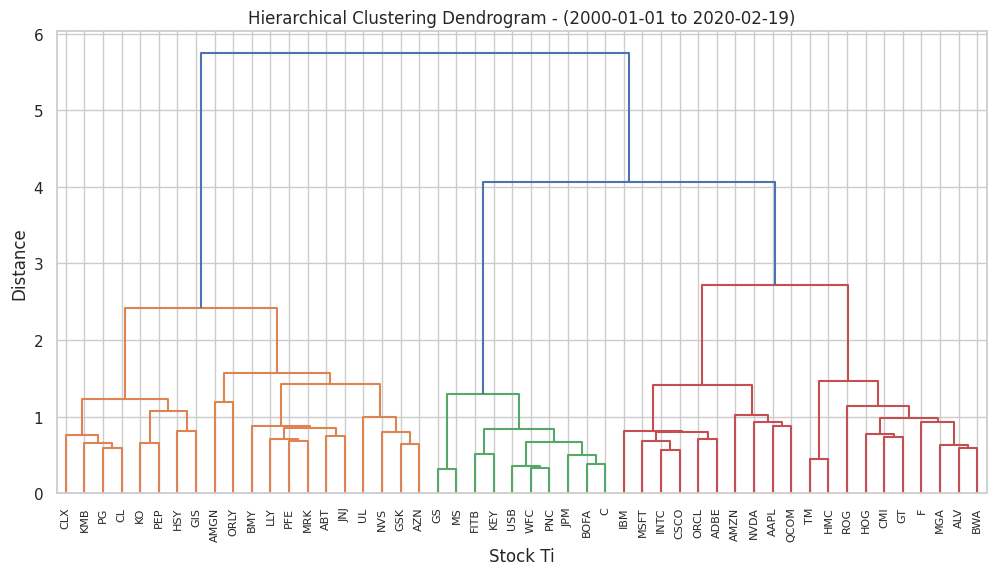

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   Asset  Cluster
0    PFE        3
1    BMY        0
2    ROG        0
3    NVS        0
4    MRK        0
5    GSK        0
6    AZN        0
7    LLY        3
8    ABT        3
9   AMGN        3
10  AAPL        0
11  MSFT        0
12  AMZN        0
13  NVDA        0
14  INTC        0
15   IBM        0
16  CSCO        0
17  ORCL        0
18  ADBE        0
19  QCOM        0
20  BOFA        0
21   JPM        0
22   WFC        0
23     C        0
24    GS        0
25    MS        0
26   PNC        0
27   USB        0
28  FITB        1
29   KEY        1
30    PG        3
31    KO        0
32   CLX        2
33    CL        3
34    UL        0
35   PEP        3
36   JNJ        3
37   KMB        3
38   HSY        0
39   GIS        2
40     F        1
41    TM        0
42   HMC        0
43   HOG        0
44   CMI        0
45    GT        1
46   ALV        1
47  ORLY        0
48   BWA        1
49   MGA        1
Silhouette Score: 0.2579859804823398
Calinski Harabasz Score: 25.798711724821164
D

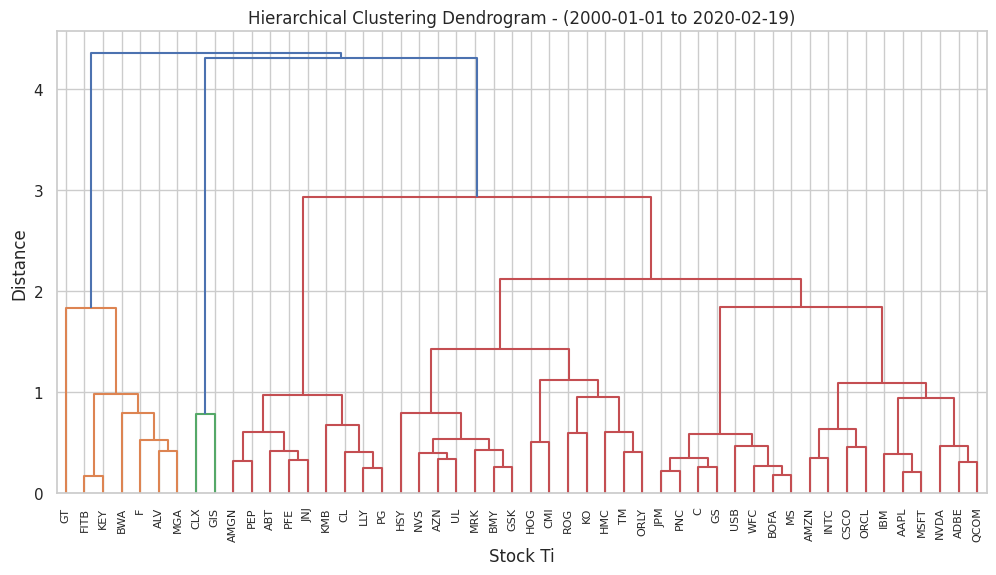

In [63]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

correlation_matrix = traintime.corr()
X = np.array(correlation_matrix)

agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
cluster_labels = agglomerative_clustering.fit_predict(X)

your_asset_list = traintime.columns.tolist()

assets_df = pd.DataFrame({'Asset': your_asset_list, 'Cluster': cluster_labels})
print(assets_df)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski Harabasz Score
ch_score = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski Harabasz Score: {ch_score}")

# Calculate Davies Bouldin Score
db_score = davies_bouldin_score(X, cluster_labels)
print(f"Davies Bouldin Score: {db_score}")
linkage_matrix = linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=your_asset_list, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram - (2000-01-01 to 2020-02-19)')
plt.xlabel('Stock Ti')
plt.ylabel('Distance')
plt.show()

correlation_matrix = bankingtime.corr()
X = np.array(correlation_matrix)

agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
cluster_labels = agglomerative_clustering.fit_predict(X)

your_asset_list = traintime.columns.tolist()

assets_df = pd.DataFrame({'Asset': your_asset_list, 'Cluster': cluster_labels})

print(assets_df)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski Harabasz Score
ch_score = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski Harabasz Score: {ch_score}")

# Calculate Davies Bouldin Score
db_score = davies_bouldin_score(X, cluster_labels)
print(f"Davies Bouldin Score: {db_score}")
linkage_matrix = linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=your_asset_list, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram - (2000-01-01 to 2020-02-19)')
plt.xlabel('Stock Ti')
plt.ylabel('Distance')
plt.show()


Training and testing : Including Market Regimes
Part A)

training : 2000 -2018

testing 1 : 2019-2020

testing 2 : 2021-2023

In [64]:
finaldfr.index = pd.to_datetime(finaldfr.index)
# Splitting the data into training, testing 1, and testing 2
training = finaldfr.loc['2000-01-01':'2018-12-31']
testing1 = finaldfr.loc['2019-01-01':'2020-12-31']
testing2 = finaldfr.loc['2021-01-01':'2023-12-31']
print("Training Data Shape:", training.shape)
print("Testing 1 Data Shape:", testing1.shape)
print("Testing 2 Data Shape:", testing2.shape)

Training Data Shape: (4779, 50)
Testing 1 Data Shape: (505, 50)
Testing 2 Data Shape: (709, 50)


In [65]:
def print_correlation_summary(correlation_matrix, num_least_correlated=10):
    avg_correlation = correlation_matrix.mean()
    least_correlated_stocks = avg_correlation.nsmallest(num_least_correlated).index.tolist()

    print(f"Least Correlated Stocks (Top {num_least_correlated}):")
    print(least_correlated_stocks)
correlation_matrix_1 = finaldfr.corr()
print("Portfolio 2:")
print_correlation_summary(correlation_matrix_1,7)
print("Portfolio 3:")
print_correlation_summary(correlation_matrix_1,10)
print("Portfolio 1:")
print_correlation_summary(correlation_matrix_1,5)
print("Portfolio 4:")
print_correlation_summary(correlation_matrix_1,13)

Portfolio 2:
Least Correlated Stocks (Top 7):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN']
Portfolio 3:
Least Correlated Stocks (Top 10):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN']
Portfolio 1:
Least Correlated Stocks (Top 5):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA']
Portfolio 4:
Least Correlated Stocks (Top 13):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'ROG', 'KMB', 'LLY']


In [66]:
p1 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA']
p2 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN']
p3 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN']
p4 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'ROG', 'KMB', 'LLY']
one = training[p1]
two = training[p2]
three = training[p3]
four = training[p4]
five = testing1[p1]
six = testing1[p2]
seven = testing1[p3]
eight = testing1[p4]
nine = testing2[p1]
ten = testing2[p2]
eleven = testing2[p3]
Twelve = testing2[p4]

#Average Returns
training_df = pd.concat([one, two, three, four], axis=0)
testing1_df = pd.concat([five, six, seven, eight], axis=0)
testing2_df = pd.concat([nine, ten, eleven, Twelve], axis=0)
average_returns_training = training_df.mean()
average_returns_testing1 = testing1_df.mean()
average_returns_testing2 = testing2_df.mean()
annualized_returns_training = average_returns_training * 252
annualized_returns_testing1 = average_returns_testing1 * 252
annualized_returns_testing2 = average_returns_testing2 * 252
print("Annualized Average Returns for Training Set:")
print(annualized_returns_training)

print("\nAnnualized Average Returns for Testing Set 1:")
print(annualized_returns_testing1)

print("\nAnnualized Average Returns for Testing Set 2:")
print(annualized_returns_testing2)


Annualized Average Returns for Training Set:
CLX     0.087153
AMZN    0.288146
GIS     0.060734
HSY     0.106114
NVDA    0.374754
ORLY    0.240981
AZN     0.070295
BMY     0.031437
AAPL    0.281884
AMGN    0.110993
ROG     0.167128
KMB     0.054697
LLY     0.064145
dtype: float64

Annualized Average Returns for Testing Set 1:
CLX     0.169818
AMZN    0.436545
GIS     0.238342
HSY     0.217774
NVDA    0.806820
ORLY    0.192121
AZN     0.182529
BMY     0.127466
AAPL    0.677758
AMGN    0.130292
ROG     0.377848
KMB     0.118293
LLY     0.243594
dtype: float64

Annualized Average Returns for Testing Set 2:
CLX    -0.143761
AMZN   -0.037865
GIS     0.060396
HSY     0.092746
NVDA    0.545314
ORLY    0.282023
AZN     0.114596
BMY    -0.038077
AAPL    0.121796
AMGN    0.078423
ROG     0.011500
KMB    -0.023998
LLY     0.473582
dtype: float64


GMV Method

In [67]:
import cvxpy as cp

def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)
    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)
    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))
    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 1 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")
expected_returns = one.mean()
cov_matrix = one.cov()
risk_free_rate = 0.02

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)


def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)

    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)

    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 2 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")

expected_returns = two.mean()
cov_matrix = two.cov()
risk_free_rate = 0.02

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)

def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)

    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)

    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))
    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 3 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")

expected_returns = three.mean()
cov_matrix = three.cov()
risk_free_rate = 0.02

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)

def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)

    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)

    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 4 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")

expected_returns = four.mean()
cov_matrix = four.cov()
risk_free_rate = 0.02

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)

Portfolio 1 Optimal Weights:
CLX: 0.24
AMZN: 0.04
GIS: 0.47
HSY: 0.22
NVDA: 0.03
Portfolio 2 Optimal Weights:
CLX: 0.19
AMZN: 0.02
GIS: 0.39
HSY: 0.18
NVDA: 0.01
ORLY: 0.06
AZN: 0.15
Portfolio 3 Optimal Weights:
CLX: 0.17
AMZN: 0.01
GIS: 0.36
HSY: 0.16
NVDA: 0.00
ORLY: 0.05
AZN: 0.11
BMY: 0.07
AAPL: 0.04
AMGN: 0.04
Portfolio 4 Optimal Weights:
CLX: 0.11
AMZN: 0.01
GIS: 0.31
HSY: 0.13
NVDA: 0.00
ORLY: 0.03
AZN: 0.09
BMY: 0.04
AAPL: 0.03
AMGN: 0.02
ROG: 0.01
KMB: 0.16
LLY: 0.05


In [68]:
# Define the returns in the code
training_returns = {
    'Portfolio 1': 0.09557523999999999,
    'Portfolio 2': 0.09385942,
    'Portfolio 3': 0.09423712,
    'Portfolio 4': 0.08421054
}

testing1_returns = {
    'Portfolio 1': 0.24235373999999998,
    'Portfolio 2': 0.22012383,
    'Portfolio 3': 0.22481032999999997,
    'Portfolio 4': 0.21035558999999998
}

testing2_returns = {
    'Portfolio 1': 0.029132419999999996,
    'Portfolio 2': 0.051740749999999995,
    'Portfolio 3': 0.04381398,
    'Portfolio 4': 0.05701539
}
training_returns_percentage = {key: value * 100 for key, value in training_returns.items()}
testing1_returns_percentage = {key: value * 100 for key, value in testing1_returns.items()}
testing2_returns_percentage = {key: value * 100 for key, value in testing2_returns.items()}
print("Training Period")
for portfolio, return_percentage in training_returns_percentage.items():
    print(f"{portfolio} Return: {return_percentage:.2f}%")

print("\nTesting Period 1")
for portfolio, return_percentage in testing1_returns_percentage.items():
    print(f"{portfolio} Return: {return_percentage:.2f}%")

print("\nTesting Period 2")
for portfolio, return_percentage in testing2_returns_percentage.items():
    print(f"{portfolio} Return: {return_percentage:.2f}%")


Training Period
Portfolio 1 Return: 9.56%
Portfolio 2 Return: 9.39%
Portfolio 3 Return: 9.42%
Portfolio 4 Return: 8.42%

Testing Period 1
Portfolio 1 Return: 24.24%
Portfolio 2 Return: 22.01%
Portfolio 3 Return: 22.48%
Portfolio 4 Return: 21.04%

Testing Period 2
Portfolio 1 Return: 2.91%
Portfolio 2 Return: 5.17%
Portfolio 3 Return: 4.38%
Portfolio 4 Return: 5.70%


MVO Method

In [69]:
mean_returns = one.mean()
cov_matrix = one.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)

result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value

optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(one.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)

mean_returns = two.mean()
cov_matrix = two.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)

result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value

optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(two.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)

mean_returns = three.mean()
cov_matrix = three.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)

result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value

optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(three.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)

mean_returns = four.mean()
cov_matrix = four.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)

result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value

optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(four.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)


Optimal Portfolio Weights:
{'CLX': '0.22', 'AMZN': '0.09', 'GIS': '0.32', 'HSY': '0.28', 'NVDA': '0.09'}
Optimal Portfolio Weights:
{'CLX': '0.16', 'AMZN': '0.06', 'GIS': '0.22', 'HSY': '0.23', 'NVDA': '0.07', 'ORLY': '0.17', 'AZN': '0.08'}
Optimal Portfolio Weights:
{'CLX': '0.14', 'AMZN': '0.04', 'GIS': '0.20', 'HSY': '0.22', 'NVDA': '0.05', 'ORLY': '0.16', 'AZN': '0.05', 'BMY': '0.01', 'AAPL': '0.11', 'AMGN': '0.01'}
Optimal Portfolio Weights:
{'CLX': '0.12', 'AMZN': '0.04', 'GIS': '0.19', 'HSY': '0.21', 'NVDA': '0.05', 'ORLY': '0.15', 'AZN': '0.04', 'BMY': '0.01', 'AAPL': '0.11', 'AMGN': '0.01', 'ROG': '0.01', 'KMB': '0.04', 'LLY': '0.01'}


In [70]:
import pandas as pd

optimal_weights = {'CLX': 0.22, 'AMZN': 0.09, 'GIS': 0.32, 'HSY': 0.28, 'NVDA': 0.09}

asset_returns = {'CLX': 0.087153, 'AMZN': 0.288146, 'GIS': 0.060734, 'HSY': 0.106114, 'NVDA': 0.374754}

weights_df = pd.DataFrame(list(optimal_weights.items()), columns=['Asset', 'Weight'])
returns_df = pd.DataFrame(list(asset_returns.items()), columns=['Asset', 'Return'])

portfolio_data = pd.merge(weights_df, returns_df, on='Asset')

portfolio_data['Weighted_Return'] = portfolio_data['Weight'].astype(float) * portfolio_data['Return']
portfolio_returns = portfolio_data['Weighted_Return'].sum()

print("Training Period:")

print("Portfolio 1 Return:", portfolio_returns)


weights = {'CLX': 0.16, 'AMZN': 0.06, 'GIS': 0.22, 'HSY': 0.23, 'NVDA': 0.07, 'ORLY': 0.17, 'AZN': 0.08}
returns = {'CLX': 0.087153, 'AMZN': 0.288146, 'GIS': 0.060734, 'HSY': 0.106114, 'NVDA': 0.374754, 'ORLY': 0.240981, 'AZN': 0.070295}

portfolio_returns = sum(weights[stock] * returns[stock] for stock in weights)

print("Portfolio 2 Return:", portfolio_returns)


weights = {'CLX': 0.14, 'AMZN': 0.04, 'GIS': 0.20, 'HSY': 0.22, 'NVDA': 0.05, 'ORLY': 0.16, 'AZN': 0.05, 'BMY': 0.01, 'AAPL': 0.11, 'AMGN': 0.01}

returns = {'CLX': 0.087153, 'AMZN': 0.288146, 'GIS': 0.060734, 'HSY': 0.106114, 'NVDA': 0.374754, 'ORLY': 0.240981, 'AZN': 0.070295, 'BMY': 0.031437, 'AAPL': 0.281884, 'AMGN': 0.110993}

portfolio_df = pd.DataFrame({'Weights': weights.values(), 'Returns': returns.values()}, index=weights.keys())

portfolio_df['Portfolio Returns'] = portfolio_df['Weights'] * portfolio_df['Returns']

total_portfolio_returns = portfolio_df['Portfolio Returns'].sum()

print(f"Portfolio 3 Return: {total_portfolio_returns:.4f}")

portfolio_weights = {'CLX': 0.12, 'AMZN': 0.04, 'GIS': 0.19, 'HSY': 0.21, 'NVDA': 0.05, 'ORLY': 0.15, 'AZN': 0.04, 'BMY': 0.01, 'AAPL': 0.11, 'AMGN': 0.01, 'ROG': 0.01, 'KMB': 0.04, 'LLY': 0.01}

stock_returns = {'CLX': 0.087153, 'AMZN': 0.288146, 'GIS': 0.060734, 'HSY': 0.106114, 'NVDA': 0.374754, 'ORLY': 0.240981, 'AZN': 0.070295, 'BMY': 0.031437, 'AAPL': 0.281884, 'AMGN': 0.110993, 'ROG': 0.167128, 'KMB': 0.054697, 'LLY': 0.064145}

portfolio_returns = sum(portfolio_weights[stock] * stock_returns[stock] for stock in portfolio_weights)

print("Portfolio 4 Return:", portfolio_returns)







print("Testing Period 1:")



optimal_weights = {'CLX': 0.22, 'AMZN': 0.09, 'GIS': 0.32, 'HSY': 0.28, 'NVDA': 0.09}

returns = {'CLX': 0.169818, 'AMZN': 0.436545, 'GIS': 0.238342, 'HSY': 0.217774, 'NVDA': 0.806820}

portfolio_returns = sum(optimal_weights[stock] * returns[stock] for stock in optimal_weights)

print("Portfolio 1 Return:", portfolio_returns)

weights = {'CLX': 0.16, 'AMZN': 0.06, 'GIS': 0.22, 'HSY': 0.23, 'NVDA': 0.07, 'ORLY': 0.17, 'AZN': 0.08}

returns = {'CLX': 0.169818, 'AMZN': 0.436545, 'GIS': 0.238342, 'HSY': 0.217774, 'NVDA': 0.806820, 'ORLY': 0.192121, 'AZN': 0.182529}

portfolio_returns = sum(weights[symbol] * returns[symbol] for symbol in weights)
print("Portfolio 2 Return:", portfolio_returns)



optimal_weights = {'CLX': 0.14, 'AMZN': 0.04, 'GIS': 0.20, 'HSY': 0.22, 'NVDA': 0.05, 'ORLY': 0.16, 'AZN': 0.05, 'BMY': 0.01, 'AAPL': 0.11, 'AMGN': 0.01}

returns_data = {
    'CLX': 0.169818,
    'AMZN': 0.436545,
    'GIS': 0.238342,
    'HSY': 0.217774,
    'NVDA': 0.806820,
    'ORLY': 0.192121,
    'AZN': 0.182529,
    'BMY': 0.127466,
    'AAPL': 0.677758,
    'AMGN': 0.130292
}

returns_df = pd.DataFrame(list(returns_data.items()), columns=['Stock', 'Return'])

returns_df.set_index('Stock', inplace=True)

portfolio_returns = (returns_df['Return'] * pd.Series(optimal_weights)).sum()

print("Portfolio 3 Return:", portfolio_returns)


weights = {'CLX': 0.12, 'AMZN': 0.04, 'GIS': 0.19, 'HSY': 0.21, 'NVDA': 0.05, 'ORLY': 0.15, 'AZN': 0.04, 'BMY': 0.01, 'AAPL': 0.11, 'AMGN': 0.01, 'ROG': 0.01, 'KMB': 0.04, 'LLY': 0.01}

returns = {'CLX': 0.169818, 'AMZN': 0.436545, 'GIS': 0.238342, 'HSY': 0.217774, 'NVDA': 0.806820, 'ORLY': 0.192121, 'AZN': 0.182529, 'BMY': 0.127466, 'AAPL': 0.677758, 'AMGN': 0.130292, 'ROG': 0.377848, 'KMB': 0.118293, 'LLY': 0.243594}

portfolio_returns = sum(weights[stock] * returns[stock] for stock in weights)

print("Portfolio 4 Return:", portfolio_returns)






print("Testing Peirod 2:")


optimal_weights = {'CLX': 0.22, 'AMZN': 0.09, 'GIS': 0.32, 'HSY': 0.28, 'NVDA': 0.09}

returns = {'CLX': -0.143761, 'AMZN': -0.037865, 'GIS': 0.060396, 'HSY': 0.092746, 'NVDA': 0.545314}

portfolio_returns = sum(optimal_weights[stock] * returns[stock] for stock in optimal_weights)

print("Portfolio 1 Return:", portfolio_returns)


weights = {'CLX': 0.16, 'AMZN': 0.06, 'GIS': 0.22, 'HSY': 0.23, 'NVDA': 0.07, 'ORLY': 0.17, 'AZN': 0.08}
returns = {'CLX': -0.143761, 'AMZN': -0.037865, 'GIS': 0.060396, 'HSY': 0.092746, 'NVDA': 0.545314, 'ORLY': 0.282023, 'AZN': 0.114596}

portfolio_returns = sum(weights[stock] * returns[stock] for stock in weights)

print("Portfolio 2 Return:", portfolio_returns)


optimal_weights = {'CLX': 0.14, 'AMZN': 0.04, 'GIS': 0.20, 'HSY': 0.22, 'NVDA': 0.05, 'ORLY': 0.16, 'AZN': 0.05, 'BMY': 0.01, 'AAPL': 0.11, 'AMGN': 0.01}

stock_returns = {'CLX': -0.143761, 'AMZN': -0.037865, 'GIS': 0.060396, 'HSY': 0.092746, 'NVDA': 0.545314, 'ORLY': 0.282023, 'AZN': 0.114596, 'BMY': -0.038077, 'AAPL': 0.121796, 'AMGN': 0.078423}

portfolio_returns = sum(optimal_weights[stock] * stock_returns[stock] for stock in optimal_weights)

print("Portfolio 3 Return:", portfolio_returns)


optimal_weights = {'CLX': 0.12, 'AMZN': 0.04, 'GIS': 0.19, 'HSY': 0.21, 'NVDA': 0.05, 'ORLY': 0.15, 'AZN': 0.04, 'BMY': 0.01, 'AAPL': 0.11, 'AMGN': 0.01, 'ROG': 0.01, 'KMB': 0.04, 'LLY': 0.01}

returns = {'CLX': -0.143761, 'AMZN': -0.037865, 'GIS': 0.060396, 'HSY': 0.092746, 'NVDA': 0.545314, 'ORLY': 0.282023, 'AZN': 0.114596, 'BMY': -0.038077, 'AAPL': 0.121796, 'AMGN': 0.078423, 'ROG': 0.011500, 'KMB': -0.023998, 'LLY': 0.473582}

portfolio_returns = sum(returns[ticker] * weight for ticker, weight in optimal_weights.items())

print("Portfolio 4 Return", portfolio_returns)

returns_data = {
    'Training Period': {
        'Portfolio 1 Return': 0.12798146,
        'Portfolio 2 Return': 0.14182409,
        'Portfolio 3 Return': 0.1525,
        'Portfolio 4 Return': 0.1504364
    },
    'Testing Period 1': {
        'Portfolio 1 Return': 0.28650897,
        'Portfolio 2 Return': 0.25962713,
        'Portfolio 3 Return': 0.29415276999999995,
        'Portfolio 4 Return': 0.29339488999999996
    },
    'Testing Peirod 2': {
        'Portfolio 1 Return': 0.05933858999999999,
        'Portfolio 2 Return': 0.10462861,
        'Portfolio 3 Return': 0.10276238000000001,
        'Portfolio 4 Returns': 0.10403089
    }
}

# Convert returns to percentage format
returns_percentage = {period: {portfolio: return_value * 100 for portfolio, return_value in returns.items()} for period, returns in returns_data.items()}
for period, returns in returns_percentage.items():
    print(f'{period}:')
    for portfolio, return_value in returns.items():
        print(f'{portfolio}: {return_value:.2f}%')
    print()


Training Period:
Portfolio 1 Return: 0.12798146
Portfolio 2 Return: 0.14182409
Portfolio 3 Return: 0.1525
Portfolio 4 Return: 0.1504364
Testing Period 1:
Portfolio 1 Return: 0.28650897
Portfolio 2 Return: 0.25962713
Portfolio 3 Return: 0.29415276999999995
Portfolio 4 Return: 0.29339488999999996
Testing Peirod 2:
Portfolio 1 Return: 0.05933858999999999
Portfolio 2 Return: 0.10462861
Portfolio 3 Return: 0.10276238000000001
Portfolio 4 Return 0.10403089
Training Period:
Portfolio 1 Return: 12.80%
Portfolio 2 Return: 14.18%
Portfolio 3 Return: 15.25%
Portfolio 4 Return: 15.04%

Testing Period 1:
Portfolio 1 Return: 28.65%
Portfolio 2 Return: 25.96%
Portfolio 3 Return: 29.42%
Portfolio 4 Return: 29.34%

Testing Peirod 2:
Portfolio 1 Return: 5.93%
Portfolio 2 Return: 10.46%
Portfolio 3 Return: 10.28%
Portfolio 4 Returns: 10.40%



Training and testing :Excluding Market Regimes
Part B)

training : 2000 -2018 (no banking crisis)

testing 1 : 2019-2020 (no covid)

testing 2 : 2021-2023 (no bond interest rate hikes)

In [71]:
finaldfr.index = pd.to_datetime(finaldfr.index)

# Splitting the data into training, testing 1, and testing 2
training = finaldfr.loc[('2000-01-01' <= finaldfr.index) & (finaldfr.index <= '2007-12-31') | ('2009-01-01' <= finaldfr.index)]
testing1 = finaldfr.loc['2019-01-01':'2019-12-31']
# Exclude the period from March 2022 to November 2022
testing2 = finaldfr.loc[('2021-01-01' <= finaldfr.index) & (finaldfr.index <= '2022-03-31') | ('2022-11-01' <= finaldfr.index)]


GMV

In [72]:
def print_correlation_summary(correlation_matrix, num_least_correlated=10):
    avg_correlation = correlation_matrix.mean()

    least_correlated_stocks = avg_correlation.nsmallest(num_least_correlated).index.tolist()

    print(f"Least Correlated Stocks (Top {num_least_correlated}):")
    print(least_correlated_stocks)

correlation_matrix_1 = finaldfr.corr()
print("Portfolio 2:")
print_correlation_summary(correlation_matrix_1,7)
print("Portfolio 3:")
print_correlation_summary(correlation_matrix_1,10)
print("Portfolio 1:")
print_correlation_summary(correlation_matrix_1,5)
print("Portfolio 4:")
print_correlation_summary(correlation_matrix_1,13)

p1 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA']
p2 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN']
p3 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN']
p4 = ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'ROG', 'KMB', 'LLY']
one = training[p1]
two = training[p2]
three = training[p3]
four = training[p4]
five = testing1[p1]
six = testing1[p2]
seven = testing1[p3]
eight = testing1[p4]
nine = testing2[p1]
ten = testing2[p2]
eleven = testing2[p3]
Twelve = testing2[p4]

training_df = pd.concat([one, two, three, four], axis=0)
testing1_df = pd.concat([five, six, seven, eight], axis=0)
testing2_df = pd.concat([nine, ten, eleven, Twelve], axis=0)

average_returns_training = training_df.mean()
average_returns_testing1 = testing1_df.mean()
average_returns_testing2 = testing2_df.mean()
annualized_returns_training = average_returns_training * 252
annualized_returns_testing1 = average_returns_testing1 * 252
annualized_returns_testing2 = average_returns_testing2 * 252

print("Annualized Average Returns for Training Set:")
print(annualized_returns_training)

print("\nAnnualized Average Returns for Testing Set 1:")
print(annualized_returns_testing1)

print("\nAnnualized Average Returns for Testing Set 2:")
print(annualized_returns_testing2)


Portfolio 2:
Least Correlated Stocks (Top 7):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN']
Portfolio 3:
Least Correlated Stocks (Top 10):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN']
Portfolio 1:
Least Correlated Stocks (Top 5):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA']
Portfolio 4:
Least Correlated Stocks (Top 13):
['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'ROG', 'KMB', 'LLY']
Annualized Average Returns for Training Set:
CLX     0.074731
AMZN    0.290125
GIS     0.074623
HSY     0.121143
NVDA    0.497487
ORLY    0.249528
AZN     0.086595
BMY     0.035179
AAPL    0.338758
AMGN    0.099908
ROG     0.185464
KMB     0.062889
LLY     0.141741
dtype: float64

Annualized Average Returns for Testing Set 1:
CLX     0.014220
AMZN    0.233471
GIS     0.336361
HSY     0.329387
NVDA    0.650058
ORLY    0.263626
AZN     0.297221
BMY     0.245681
AAPL    0.656629
AMGN    0.235879
ROG     0.351303
KMB     0.207782
LLY     0.148918
d

In [73]:
import pandas as pd
import numpy as np
import cvxpy as cp

def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)
    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)
    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))
    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 1 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")
expected_returns = one.mean()
cov_matrix = one.cov()
risk_free_rate = 0.02

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)


def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)

    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)

    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 2 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")

expected_returns = two.mean()
cov_matrix = two.cov()
risk_free_rate = 0.02

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)

def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)

    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)

    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()
    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 3 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")

expected_returns = three.mean()
cov_matrix = three.cov()
risk_free_rate = 0.02

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)

def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate, min_weight_diff=0.01):
    num_stocks = len(expected_returns)

    weights = cp.Variable(num_stocks)
    slack_variables = cp.Variable(num_stocks - 1, nonneg=True)

    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        weights[1:] - weights[:-1] <= slack_variables,
        slack_variables >= min_weight_diff
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == cp.OPTIMAL:
        optimal_weights = weights.value
        np.set_printoptions(suppress=True)
        print("Portfolio 4 Optimal Weights:")
        for stock, weight in zip(expected_returns.index, optimal_weights):
            print(f"{stock}: {weight:.2f}")
    else:
        print("Optimization problem not solved successfully.")

expected_returns = four.mean()
cov_matrix = four.cov()
risk_free_rate = 0.19

optimize_portfolio(expected_returns, cov_matrix, risk_free_rate)



Portfolio 1 Optimal Weights:
CLX: 0.22
AMZN: 0.06
GIS: 0.42
HSY: 0.27
NVDA: 0.03
Portfolio 2 Optimal Weights:
CLX: 0.18
AMZN: 0.03
GIS: 0.33
HSY: 0.20
NVDA: 0.02
ORLY: 0.07
AZN: 0.17
Portfolio 3 Optimal Weights:
CLX: 0.15
AMZN: 0.02
GIS: 0.30
HSY: 0.17
NVDA: 0.01
ORLY: 0.06
AZN: 0.13
BMY: 0.09
AAPL: 0.03
AMGN: 0.03
Portfolio 4 Optimal Weights:
CLX: 0.10
AMZN: 0.02
GIS: 0.25
HSY: 0.14
NVDA: 0.00
ORLY: 0.05
AZN: 0.10
BMY: 0.06
AAPL: 0.03
AMGN: 0.02
ROG: 0.02
KMB: 0.15
LLY: 0.05


In [74]:
weights1 = {'CLX': 0.22, 'AMZN': 0.06, 'GIS': 0.42, 'HSY': 0.27, 'NVDA': 0.03}

weights2 = {'CLX': 0.18, 'AMZN': 0.03, 'GIS': 0.33, 'HSY': 0.20, 'NVDA': 0.02, 'ORLY': 0.07, 'AZN': 0.17}

weights3 = {'CLX': 0.15, 'AMZN': 0.02, 'GIS': 0.30, 'HSY': 0.17, 'NVDA': 0.01, 'ORLY': 0.06, 'AZN': 0.13, 'BMY': 0.09, 'AAPL': 0.03, 'AMGN': 0.03}

weights4 = {'CLX': 0.10, 'AMZN': 0.02, 'GIS': 0.25, 'HSY': 0.14, 'NVDA': 0.00, 'ORLY': 0.05, 'AZN': 0.10, 'BMY': 0.06, 'AAPL': 0.03, 'AMGN': 0.02, 'ROG': 0.02, 'KMB': 0.15, 'LLY': 0.05}
#Training Period
print("Training Period")

# Portfolio 1
returns1 = pd.Series({'CLX': 0.074731, 'AMZN': 0.290125, 'GIS': 0.074623, 'HSY': 0.121143, 'NVDA': 0.497487})

# Portfolio 2
returns2 = pd.Series({'CLX': 0.074731, 'AMZN': 0.290125, 'GIS': 0.074623, 'HSY': 0.121143, 'NVDA': 0.497487, 'ORLY': 0.249528, 'AZN': 0.086595})

# Portfolio 3
returns3 = pd.Series({'CLX': 0.074731, 'AMZN': 0.290125, 'GIS': 0.074623, 'HSY': 0.121143, 'NVDA': 0.497487, 'ORLY': 0.249528, 'AZN': 0.086595, 'BMY': 0.035179, 'AAPL': 0.338758, 'AMGN': 0.099908})

# Portfolio 4
returns4 = pd.Series({'CLX': 0.074731, 'AMZN': 0.290125, 'GIS': 0.074623, 'HSY': 0.121143, 'NVDA': 0.497487, 'ORLY': 0.249528, 'AZN': 0.086595, 'BMY': 0.035179, 'AAPL': 0.338758, 'AMGN': 0.099908, 'ROG': 0.185464, 'KMB': 0.062889, 'LLY': 0.1417})

# Portfolio 1
portfolio_return1 = sum(weights1[stock] * returns1[stock] for stock in weights1)
print("Portfolio 1 Return:", portfolio_return1*100)

# Portfolio 2
portfolio_return2 = sum(returns2 * pd.Series(weights2))
print("Portfolio 2 Return:", portfolio_return2*100)

# Portfolio 3
portfolio_return3 = np.dot(list(weights3.values()), returns3)
print("Portfolio 3 Return:", portfolio_return3*100)

# Portfolio 4
portfolio_return4 = np.dot(list(weights4.values()), returns4)
print("Portfolio 4 Return:", portfolio_return4*100)


#Testing Period 1
print("Testing Period 1")

# Portfolio 1
returns1 = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058})

# Portfolio 2
returns2 = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058, 'ORLY': 0.263626, 'AZN': 0.297221})

# Portfolio 3
returns3 = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058, 'ORLY': 0.263626, 'AZN': 0.297221, 'BMY': 0.245681, 'AAPL': 0.656629, 'AMGN': 0.235879})

# Portfolio 4
returns4 = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058, 'ORLY': 0.263626, 'AZN': 0.297221, 'BMY': 0.245681, 'AAPL': 0.656629, 'AMGN': 0.235879, 'ROG': 0.351303, 'KMB': 0.207782, 'LLY': 0.148918})

# Portfolio 1
portfolio_return1 = sum(weights1[stock] * returns1[stock] for stock in weights1)
print("Portfolio 1 Return:", portfolio_return1*100)

# Portfolio 2
portfolio_return2 = sum(returns2 * pd.Series(weights2))
print("Portfolio 2 Return:", portfolio_return2*100)

# Portfolio 3
portfolio_return3 = np.dot(list(weights3.values()), returns3)
print("Portfolio 3 Return:", portfolio_return3*100)

# Portfolio 4
portfolio_return4 = np.dot(list(weights4.values()), returns4)
print("Portfolio 4 Return:", portfolio_return4*100)

#Testing Period 2
print("Testing Period 2")
# Portfolio 1
returns1 = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465})

# Portfolio 2
returns2 = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465, 'ORLY': 0.251553, 'AZN': 0.188868})

# Portfolio 3
returns3 = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465, 'ORLY': 0.251553, 'AZN': 0.188868, 'BMY': -0.080479, 'AAPL': 0.194151, 'AMGN': 0.043130})

# Portfolio 4
returns4 = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465, 'ORLY': 0.251553, 'AZN': 0.188868, 'BMY': -0.080479, 'AAPL': 0.194151, 'AMGN': 0.043130, 'ROG': 0.076002, 'KMB': -0.042357, 'LLY': 0.480860})

# Portfolio 1
portfolio_return1 = sum(weights1[stock] * returns1[stock] for stock in weights1)
print("Portfolio 1 Return:", portfolio_return1*100)

# Portfolio 2
portfolio_return2 = sum(returns2 * pd.Series(weights2))
print("Portfolio 2 Return:", portfolio_return2*100)

# Portfolio 3
portfolio_return3 = np.dot(list(weights3.values()), returns3)
print("Portfolio 3 Return:", portfolio_return3*100)

# Portfolio 4
portfolio_return4 = np.dot(list(weights4.values()), returns4)
print("Portfolio 4 Return:", portfolio_return4*100)

Training Period
Portfolio 1 Return: 11.28232
Portfolio 2 Return: 11.314737000000001
Portfolio 3 Return: 10.752335
Portfolio 4 Return: 10.452653999999999
Testing Period 1
Portfolio 1 Return: 26.684451000000003
Portfolio 2 Return: 26.842281000000007
Portfolio 3 Return: 27.354991000000005
Portfolio 4 Return: 26.399582
Testing Period 2
Portfolio 1 Return: 0.08318400000000004
Portfolio 2 Return: 4.246277
Portfolio 3 Return: 2.6365920000000007
Portfolio 4 Return: 3.9323830000000006


MVO

In [75]:
mean_returns = one.mean()
cov_matrix = one.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)
result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value
optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(one.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)

mean_returns = two.mean()
cov_matrix = two.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)
result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value
optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(two.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)

mean_returns = three.mean()
cov_matrix = three.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)
result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value
optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(three.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)

mean_returns = four.mean()
cov_matrix = four.cov()

num_assets = len(mean_returns)

weights = cp.Variable(num_assets)
expected_return = cp.sum(cp.multiply(weights, mean_returns))
portfolio_variance = cp.quad_form(weights, cov_matrix)

risk_aversion = 5
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0.01
]

problem = cp.Problem(objective, constraints)
result = problem.solve()

weights_normalized = weights.value / cp.sum(weights).value
optimal_weights_dict = {asset: '{:.2f}'.format(weight) for asset, weight in zip(four.columns, weights_normalized)}

print("Optimal Portfolio Weights:")
print(optimal_weights_dict)

weights1 = {'CLX': '0.15', 'AMZN': '0.09', 'GIS': '0.28', 'HSY': '0.34', 'NVDA': '0.14'}
weights2 = {'CLX': '0.09', 'AMZN': '0.06', 'GIS': '0.19', 'HSY': '0.27', 'NVDA': '0.12', 'ORLY': '0.19', 'AZN': '0.09'}
weights3 = {'CLX': '0.07', 'AMZN': '0.04', 'GIS': '0.17', 'HSY': '0.25', 'NVDA': '0.09', 'ORLY': '0.17', 'AZN': '0.06', 'BMY': '0.01', 'AAPL': '0.14', 'AMGN': '0.01'}
weights4 = {'CLX': '0.05', 'AMZN': '0.03', 'GIS': '0.14', 'HSY': '0.22', 'NVDA': '0.08', 'ORLY': '0.16', 'AZN': '0.02', 'BMY': '0.01', 'AAPL': '0.14', 'AMGN': '0.01', 'ROG': '0.01', 'KMB': '0.01', 'LLY': '0.12'}

portfolio1_weights = weights1
portfolio2_weights = weights2
portfolio3_weights = weights3
portfolio4_weights = weights4

print("Portfolio 1 Optimal Weights:")
print(portfolio1_weights)

print("\nPortfolio 2 Optimal Weights:")
print(portfolio2_weights)

print("\nPortfolio 3 Optimal Weights:")
print(portfolio3_weights)

print("\nPortfolio 4 Optimal Weights:")
print(portfolio4_weights)

weights1 = {stock: float(weight) for stock, weight in weights1.items()}
returns = pd.Series({'CLX': 0.074731, 'AMZN': 0.290125, 'GIS': 0.074623, 'HSY': 0.121143, 'NVDA': 0.497487})
portfolio_return = np.dot(list(weights1.values()), returns)
print("Training Period")
print("Portfolio 1 Return:", portfolio_return*100)

weights2 = {stock: float(weight) for stock, weight in weights2.items()}
returns = pd.Series({'CLX': 0.074731, 'AMZN': 0.290125, 'GIS': 0.074623, 'HSY': 0.121143, 'NVDA': 0.497487, 'ORLY': 0.249528, 'AZN': 0.086595})
portfolio_return = np.dot(list(weights2.values()), returns)
print("Portfolio 2 Return:", portfolio_return*100)

weights3 = {stock: float(weight) for stock, weight in weights3.items()}
returns = pd.Series({'CLX': 0.074731, 'AMZN': 0.290125, 'GIS': 0.074623, 'HSY': 0.121143, 'NVDA': 0.497487,
                     'ORLY': 0.249528, 'AZN': 0.086595, 'BMY': 0.035179, 'AAPL': 0.338758, 'AMGN': 0.099908})
portfolio_return = np.dot(list(weights3.values()), returns)
print("Portfolio 3 Return:", portfolio_return*100)

weights4 = {stock: float(weight) for stock, weight in weights4.items()}
returns = pd.Series({
    'CLX': 0.074731,
    'AMZN': 0.290125,
    'GIS': 0.074623,
    'HSY': 0.121143,
    'NVDA': 0.497487,
    'ORLY': 0.249528,
    'AZN': 0.086595,
    'BMY': 0.035179,
    'AAPL': 0.338758,
    'AMGN': 0.099908,
    'ROG': 0.185464,
    'KMB': 0.062889,
    'LLY': 0.141741
})
portfolio_return = np.dot(list(weights4.values()), returns)
print("Portfolio 4 Return:", portfolio_return*100)

print("Testing Period 1")

weights1 = {stock: float(weight) for stock, weight in weights1.items()}
returns = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058})
portfolio_return = np.dot(list(weights1.values()), returns)
print("Portfolio 1 Return:", portfolio_return*100)

weights2 = {stock: float(weight) for stock, weight in weights2.items()}
returns = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058, 'ORLY': 0.263626, 'AZN': 0.297221})
portfolio_return = np.dot(list(weights2.values()), returns)
print("Portfolio 2 Return:", portfolio_return*100)

weights3 = {stock: float(weight) for stock, weight in weights3.items()}
returns = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058, 'ORLY': 0.263626, 'AZN': 0.297221, 'BMY': 0.245681, 'AAPL': 0.656629, 'AMGN': 0.235879})
portfolio_return = np.dot(list(weights3.values()), returns)
print("Portfolio 3 Return:", portfolio_return*100)

weights4 = {stock: float(weight) for stock, weight in weights4.items()}
returns = pd.Series({'CLX': 0.014220, 'AMZN': 0.233471, 'GIS': 0.336361, 'HSY': 0.329387, 'NVDA': 0.650058, 'ORLY': 0.263626, 'AZN': 0.297221, 'BMY': 0.245681, 'AAPL': 0.656629, 'AMGN': 0.235879, 'ROG': 0.351303, 'KMB': 0.207782, 'LLY': 0.148918})
portfolio_return = np.dot(list(weights4.values()), returns)
print("Portfolio 4 Return:", portfolio_return*100)

print("Testing Period 2")

weights1 = {stock: float(weight) for stock, weight in weights1.items()}
returns = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465})
portfolio_return = np.dot(list(weights1.values()), returns)
print("Portfolio 1 Return:", portfolio_return*100)

weights2 = {stock: float(weight) for stock, weight in weights2.items()}
returns = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465, 'ORLY': 0.251553, 'AZN': 0.188868})
portfolio_return = np.dot(list(weights2.values()), returns)
print("Portfolio 2 Return:", portfolio_return*100)

weights3 = {stock: float(weight) for stock, weight in weights3.items()}
returns = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465, 'ORLY': 0.251553, 'AZN': 0.188868, 'BMY': -0.080479, 'AAPL': 0.194151, 'AMGN': 0.043130})
portfolio_return = np.dot(list(weights3.values()), returns)
print("Portfolio 3 Return:", portfolio_return*100)

weights4 = {stock: float(weight) for stock, weight in weights4.items()}
returns = pd.Series({'CLX': -0.215382, 'AMZN': 0.125608, 'GIS': -0.014256, 'HSY': 0.067011, 'NVDA': 0.952465, 'ORLY': 0.251553, 'AZN': 0.188868, 'BMY': -0.080479, 'AAPL': 0.194151, 'AMGN': 0.043130, 'ROG': 0.076002, 'KMB': -0.042357, 'LLY': 0.480860})
portfolio_return = np.dot(list(weights4.values()), returns)
print("Portfolio 4 Return:", portfolio_return*100)


Optimal Portfolio Weights:
{'CLX': '0.15', 'AMZN': '0.09', 'GIS': '0.28', 'HSY': '0.34', 'NVDA': '0.14'}
Optimal Portfolio Weights:
{'CLX': '0.09', 'AMZN': '0.06', 'GIS': '0.19', 'HSY': '0.27', 'NVDA': '0.12', 'ORLY': '0.19', 'AZN': '0.09'}
Optimal Portfolio Weights:
{'CLX': '0.07', 'AMZN': '0.04', 'GIS': '0.17', 'HSY': '0.25', 'NVDA': '0.09', 'ORLY': '0.17', 'AZN': '0.06', 'BMY': '0.01', 'AAPL': '0.14', 'AMGN': '0.01'}
Optimal Portfolio Weights:
{'CLX': '0.05', 'AMZN': '0.03', 'GIS': '0.14', 'HSY': '0.22', 'NVDA': '0.08', 'ORLY': '0.16', 'AZN': '0.02', 'BMY': '0.01', 'AAPL': '0.14', 'AMGN': '0.01', 'ROG': '0.01', 'KMB': '0.01', 'LLY': '0.12'}
Portfolio 1 Optimal Weights:
{'CLX': '0.15', 'AMZN': '0.09', 'GIS': '0.28', 'HSY': '0.34', 'NVDA': '0.14'}

Portfolio 2 Optimal Weights:
{'CLX': '0.09', 'AMZN': '0.06', 'GIS': '0.19', 'HSY': '0.27', 'NVDA': '0.12', 'ORLY': '0.19', 'AZN': '0.09'}

Portfolio 3 Optimal Weights:
{'CLX': '0.07', 'AMZN': '0.04', 'GIS': '0.17', 'HSY': '0.25', 'NVDA': '0

Performance Statistics

In [76]:
exclude_periods_list = [('2007-12-01', '2009-06-30'), ('2020-02-20', '2020-04-10'), ('2022-03-01', '2022-11-30')]
finaldfr.index = pd.to_datetime(finaldfr.index)
for start, end in exclude_periods_list:
    finaldfr = finaldfr.loc[(finaldfr.index < start) | (finaldfr.index > end)]
print(finaldfr)
import numpy as np
import pandas as pd
import yfinance as yf
start_date = '2000-01-01'
end_date = '2023-10-26'

returns_df = finaldfr[['HSY', 'CLX', 'AMZN', 'GIS', 'NVDA', 'ORLY', 'AZN', 'KMB', 'LLY', 'PG']]

# Calculate annualized returns
annualized_returns = returns_df.mean() * 252
# Calculate max drawdown
cumulative_returns = (1 + returns_df).cumprod()
peak_value = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak_value) / peak_value
max_drawdown = drawdown.min().min()
risk_free_rate = 0.02
beta = 1.2
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
sp500r = sp500.pct_change()
benchmark_returns = pd.Series(sp500r, index=returns_df.index)

# Calculate annualized portfolio return
portfolio_return = annualized_returns.mean()

# Calculate Treynor Ratio
treynor_ratio = (portfolio_return - risk_free_rate) / beta

# Calculate Information Ratio
excess_returns = returns_df.mean(axis=1) - benchmark_returns
information_ratio = excess_returns.mean() / excess_returns.std()

# Calculate Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / annualized_returns.std()

# Calculate Sortino Ratio
downside_returns = returns_df[returns_df < 0].mean() * 252
sortino_ratio = (portfolio_return - risk_free_rate) / downside_returns.std()

# Calculate Calmar Ratio
calmar_ratio = portfolio_return / abs(max_drawdown)

# Calculate Jensen's Alpha
market_return = 0.08
jensens_alpha = portfolio_return - (risk_free_rate + beta * (market_return - risk_free_rate))

# Calculate Tracking Error
tracking_error = np.std(excess_returns.dropna())
print("Treynor Ratio:", treynor_ratio)
print("Information Ratio:", information_ratio)
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)
print("Calmar Ratio:", calmar_ratio)
print("Jensen's Alpha:", jensens_alpha)


                 PFE       BMY       ROG       NVS       MRK       GSK  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.037255 -0.075655 -0.029703 -0.018902 -0.035119 -0.025872   
2000-01-05  0.016294 -0.010492  0.013605  0.004379  0.039271  0.033487   
2000-01-06  0.036071  0.013785  0.036913  0.021798  0.008296 -0.014525   
2000-01-07  0.067697  0.146443  0.025890  0.015358  0.095977  0.052153   
...              ...       ...       ...       ...       ...       ...   
2023-10-20 -0.017313 -0.000354  0.000724  0.000423  0.022304  0.005369   
2023-10-23  0.006199 -0.008147 -0.010774  0.000106  0.006623  0.006183   
2023-10-24 -0.013294  0.002143  0.001869  0.002323 -0.003096  0.005028   
2023-10-25  0.009859  0.008731 -0.044053  0.005479  0.005824  0.001946   
2023-10-26  0.013993 -0.064300  0.010863 -0.011841  0.018527 -0.010264   

                 AZN       LLY       

Comparison with Benchmark

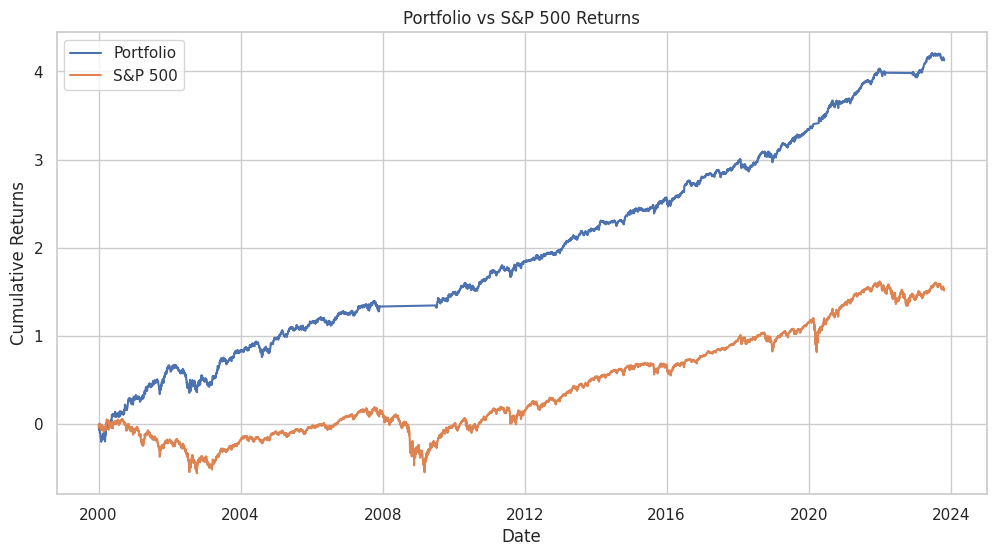

In [77]:
# Stocks and Weights
stocks = ['HSY', 'CLX', 'AMZN', 'GIS', 'NVDA', 'ORLY', 'AZN', 'KMB', 'LLY', 'PG']
weights = {'HSY': 0.25, 'CLX': 0.01, 'AMZN': 0.05, 'GIS': 0.05, 'NVDA': 0.13, 'ORLY': 0.18, 'AZN': 0.03, 'KMB': 0.01, 'LLY': 0.11, 'PG': 0.16}
start_date = '2000-01-01'
end_date = '2023-10-26'
finalportfolio = finaldfr[stocks]
sp500r = sp500.pct_change()
finalportfolior = (finalportfolio * pd.Series(weights)).sum(axis=1)
plt.figure(figsize=(12, 6))
plt.plot(finalportfolior.cumsum(), label='Portfolio')
plt.plot(sp500r.cumsum(), label='S&P 500')
plt.title('Portfolio vs S&P 500 Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

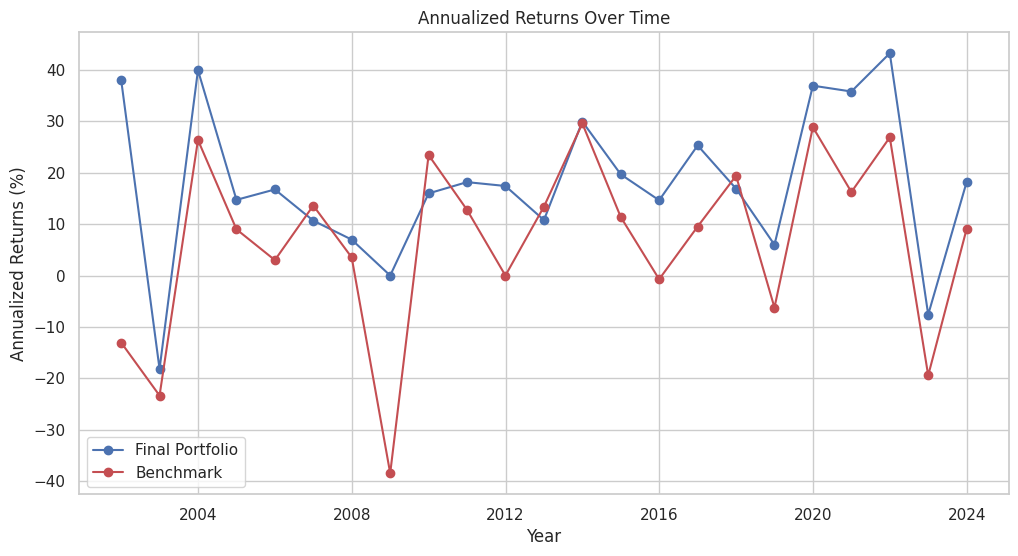

In [78]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
stocks = ['HSY', 'CLX', 'AMZN', 'GIS', 'NVDA', 'ORLY', 'AZN', 'KMB', 'LLY', 'PG']
weights = {'HSY': 0.25, 'CLX': 0.01, 'AMZN': 0.05, 'GIS': 0.05, 'NVDA': 0.13, 'ORLY': 0.18, 'AZN': 0.03, 'KMB': 0.01, 'LLY': 0.11, 'PG': 0.16}
start_date = '2000-01-01'
end_date = '2023-10-26'
finalportfolio = finaldfr[stocks]
sp500r = sp500.pct_change()
finalportfolior = (finalportfolio * pd.Series(weights)).sum(axis=1)

# Calculate annualized returns
cumulative_returns = (1 + finalportfolior).cumprod()
annual_returns = cumulative_returns.resample('Y').last().pct_change()
cumulative_returns1 = (1 + sp500r).cumprod()
annual_returns1 = cumulative_returns1.resample('Y').last().pct_change()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(annual_returns.index, annual_returns * 100, marker='o', linestyle='-', color='b', label='Final Portfolio')
plt.plot(annual_returns1.index, annual_returns1 * 100, marker='o', linestyle='-', color='r', label='Benchmark')

plt.title('Annualized Returns Over Time')
plt.xlabel('Year')
plt.legend()
plt.ylabel('Annualized Returns (%)')
plt.grid(True)
plt.show()


In [79]:
stocks = ['HSY', 'CLX', 'AMZN', 'GIS', 'NVDA', 'ORLY', 'AZN', 'KMB', 'LLY', 'PG']
weights = {'HSY': 0.25, 'CLX': 0.01, 'AMZN': 0.05, 'GIS': 0.05, 'NVDA': 0.13, 'ORLY': 0.18, 'AZN': 0.03, 'KMB': 0.01, 'LLY': 0.11, 'PG': 0.16}
start_date = '2000-01-01'
end_date = '2023-10-26'
finalportfolio = finaldf[stocks]
finalportfolio = (finalportfolio * pd.Series(weights)).sum(axis=1)

finalfinal = (finalportfolio.iloc[-1]-finalportfolio.iloc[0])/finalportfolio.iloc[0]*100
stocks = ['HSY', 'CLX', 'AMZN', 'GIS', 'NVDA', 'ORLY', 'AZN', 'KMB', 'LLY', 'PG']
weights1 = {'HSY': 0.15, 'CLX': 0.06, 'AMZN': 0.02, 'GIS': 0.24, 'NVDA': 0.02, 'ORLY': 0.06, 'AZN': 0.11, 'KMB': 0.11, 'LLY': 0.08, 'PG': 0.15}
start_date = '2000-03-01'
end_date = '2023-09-30'
finalportfolio = finaldf[stocks]
finalportfolio = (finalportfolio * pd.Series(weights1)).sum(axis=1)
print(finalfinal)
finalfinal = (finalportfolio.iloc[-1]-finalportfolio.iloc[0])/finalportfolio.iloc[0]*100

start_date = '2000-03-01'
end_date = '2023-12-14'
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
finalsp500 = (sp500.iloc[-1]-sp500.iloc[0])/sp500.iloc[0]*100
finalsp500

stocks = ['HSY', 'CLX', 'AMZN', 'GIS', 'NVDA', 'ORLY', 'AZN', 'KMB', 'LLY', 'PG']
weights = {'HSY': 0.25, 'CLX': 0.01, 'AMZN': 0.05, 'GIS': 0.05, 'NVDA': 0.13, 'ORLY': 0.18, 'AZN': 0.03, 'KMB': 0.01, 'LLY': 0.11, 'PG': 0.16}
testing1 = finaldf.loc['2019-01-02':'2023-10-26']
start_date = '2019-01-01'
end_date = '2023-10-26'

#Testing 1
finalportfolio = testing1[stocks]
finalportfolio = (finalportfolio * pd.Series(weights)).sum(axis=1)
finalfinal = (finalportfolio.iloc[-1]-finalportfolio.iloc[0])/finalportfolio.iloc[0]*100
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
finalsp500 = (sp500.iloc[-1]-sp500.iloc[0])/sp500.iloc[0]*100
print(finalfinal)
print(finalsp500)


p1 = ['HSY', 'CLX', 'AMZN', 'GIS', 'NVDA', 'ORLY', 'AZN', 'KMB', 'LLY', 'PG']
one = finaldfr[p1]

average_returns_training = one.mean()
annualized_returns_training = average_returns_training * 252

# Display the results
print("Annualized Average Returns:")
print(annualized_returns_training)


1283.5080818781823
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
183.498147799943
66.80159084407742
Annualized Average Returns:
HSY     0.122151
CLX     0.069801
AMZN    0.301491
GIS     0.068130
NVDA    0.520514
ORLY    0.242876
AZN     0.088948
KMB     0.066908
LLY     0.133409
PG      0.091390
dtype: float64


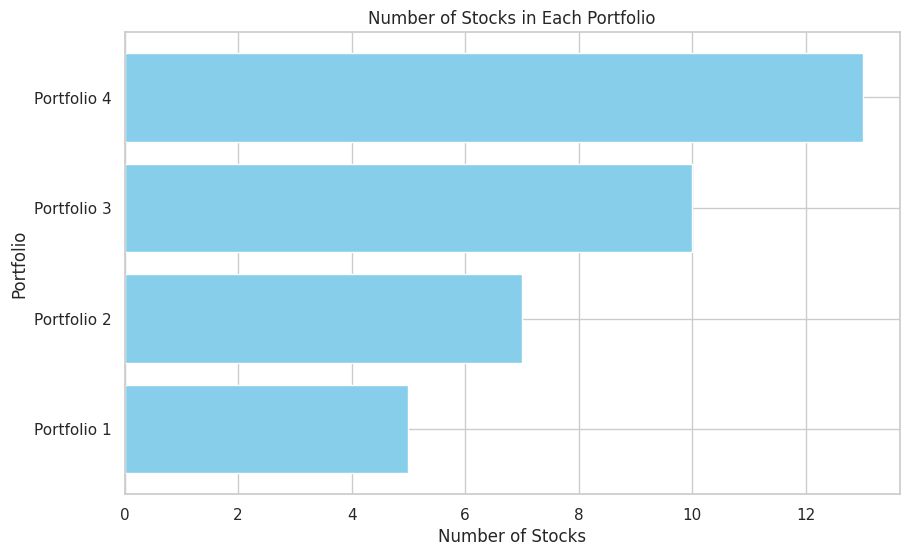

In [80]:

portfolios = {
    'Portfolio 1': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA'],
    'Portfolio 2': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN'],
    'Portfolio 3': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN'],
    'Portfolio 4': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'PG', 'KMB', 'LLY']
}

portfolio_sizes = [len(stocks) for stocks in portfolios.values()]
plt.figure(figsize=(10, 6))
plt.barh(list(portfolios.keys()), portfolio_sizes, color='skyblue')
plt.xlabel('Number of Stocks')
plt.ylabel('Portfolio')
plt.title('Number of Stocks in Each Portfolio')
plt.show()


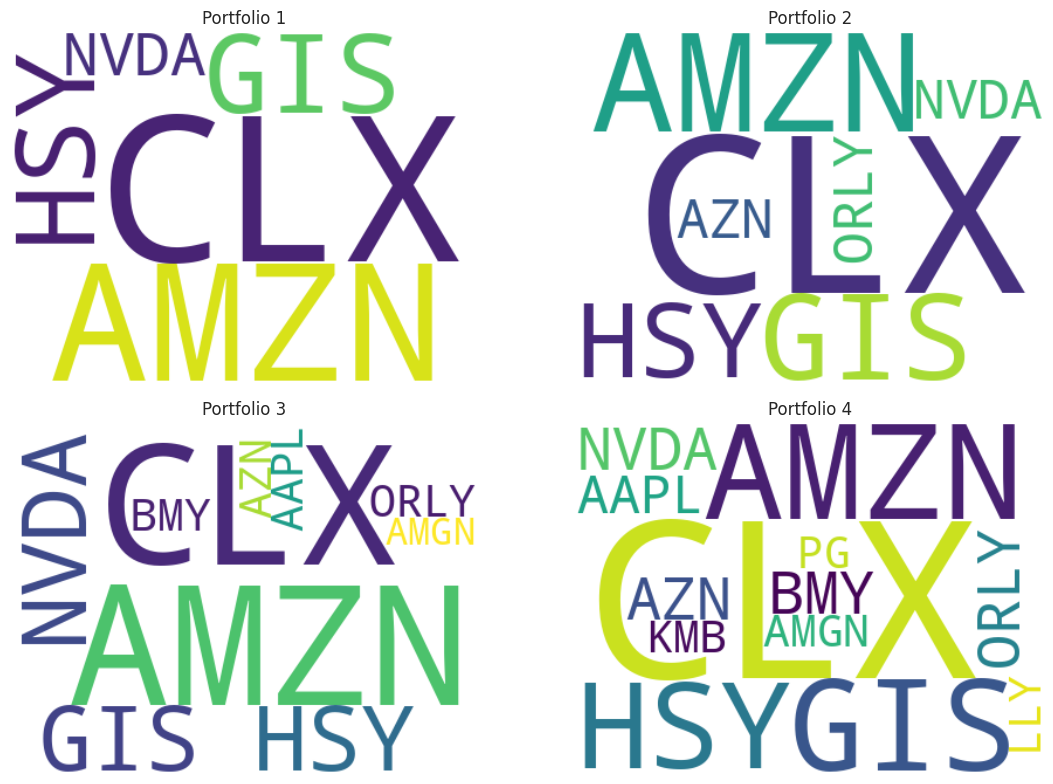

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

portfolios = {
    'Portfolio 1': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA'],
    'Portfolio 2': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN'],
    'Portfolio 3': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN'],
    'Portfolio 4': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'PG', 'KMB', 'LLY']
}

plt.figure(figsize=(12, 8))
for i, (portfolio, stocks) in enumerate(portfolios.items(), 1):
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(', '.join(stocks))

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(portfolio)

plt.tight_layout()
plt.show()


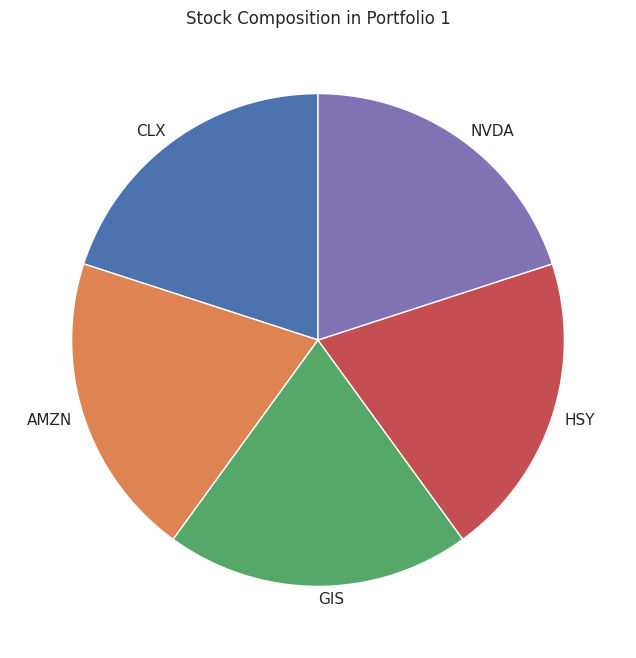

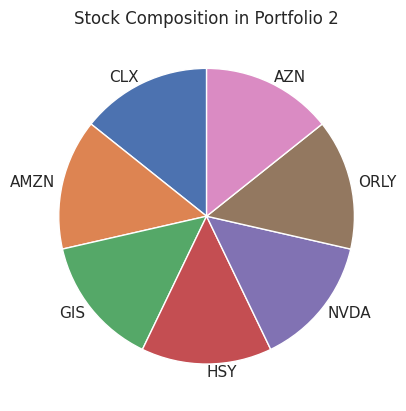

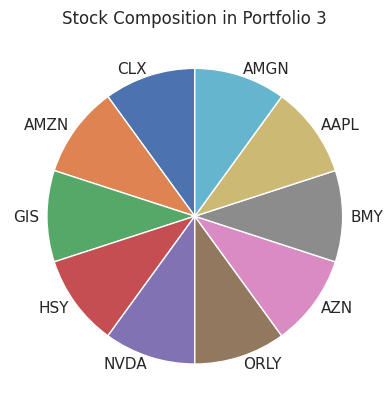

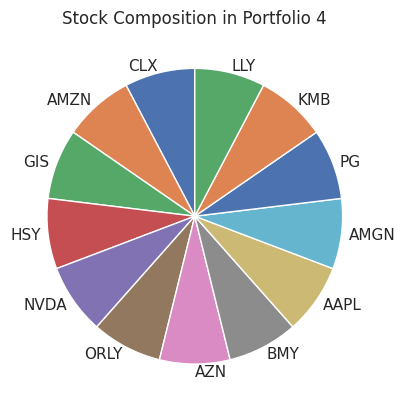

In [82]:

portfolios = {
    'Portfolio 1': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA'],
    'Portfolio 2': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN'],
    'Portfolio 3': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN'],
    'Portfolio 4': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'PG', 'KMB', 'LLY']
}

# Plotting the pie chart
plt.figure(figsize=(12, 8))

for portfolio, stocks in portfolios.items():
    plt.pie([1] * len(stocks), labels=stocks, startangle=90, labeldistance=1.05)
    plt.title(f'Stock Composition in {portfolio}')
    plt.show()


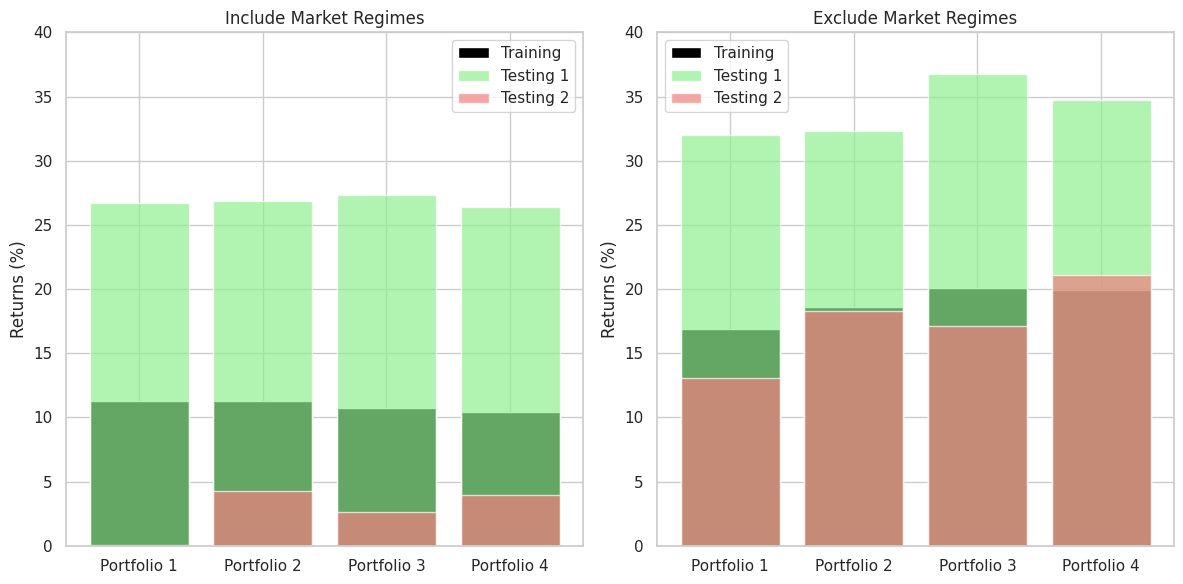

In [83]:
import matplotlib.pyplot as plt

# Data for Include market regimes
portfolios = ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4']
training_returns = [11.28, 11.31, 10.75, 10.45]
testing_returns_1 = [26.68, 26.84, 27.35, 26.39]
testing_returns_2 = [0.08, 4.24, 2.63, 3.93]

# Data for Exclude market regimes
training_returns_excluded = [16.91,18.59,20.09, 19.92]
testing_returns_1_excluded = [32.03, 32.29, 36.77, 34.76]
testing_returns_2_excluded = [13.11, 18.26, 17.09, 21.08]

# Colors for bars
training_color = 'black'
testing_1_color = 'lightgreen'
testing_2_color = 'lightcoral'

# Plotting Include market regimes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(portfolios, training_returns, label='Training', color=training_color)
plt.bar(portfolios, testing_returns_1, label='Testing 1', alpha=0.7, color=testing_1_color)
plt.bar(portfolios, testing_returns_2, label='Testing 2', alpha=0.7, color=testing_2_color)
plt.title('Include Market Regimes')
plt.ylabel('Returns (%)')
plt.ylim(0, 40)
plt.legend()

# Plotting Exclude market regimes
plt.subplot(1, 2, 2)
plt.bar(portfolios, training_returns_excluded, label='Training', color=training_color)
plt.bar(portfolios, testing_returns_1_excluded, label='Testing 1', alpha=0.7, color=testing_1_color)
plt.bar(portfolios, testing_returns_2_excluded, label='Testing 2', alpha=0.7, color=testing_2_color)
plt.title('Exclude Market Regimes')
plt.ylabel('Returns (%)')
plt.ylim(0, 40)
plt.legend()

plt.tight_layout()
plt.show()


In [84]:
from prettytable import PrettyTable
portfolios = {
    'Portfolio 1': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA'],
    'Portfolio 2': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN'],
    'Portfolio 3': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN'],
    'Portfolio 4': ['CLX', 'AMZN', 'GIS', 'HSY', 'NVDA', 'ORLY', 'AZN', 'BMY', 'AAPL', 'AMGN', 'PG', 'KMB', 'LLY']
}
table = PrettyTable()
table.field_names = ['Portfolio', 'Stocks']
for portfolio, stocks in portfolios.items():
    table.add_row([portfolio, ', '.join(stocks)])
print(table)


+-------------+---------------------------------------------------------------------+
|  Portfolio  |                                Stocks                               |
+-------------+---------------------------------------------------------------------+
| Portfolio 1 |                      CLX, AMZN, GIS, HSY, NVDA                      |
| Portfolio 2 |                 CLX, AMZN, GIS, HSY, NVDA, ORLY, AZN                |
| Portfolio 3 |        CLX, AMZN, GIS, HSY, NVDA, ORLY, AZN, BMY, AAPL, AMGN        |
| Portfolio 4 | CLX, AMZN, GIS, HSY, NVDA, ORLY, AZN, BMY, AAPL, AMGN, PG, KMB, LLY |
+-------------+---------------------------------------------------------------------+


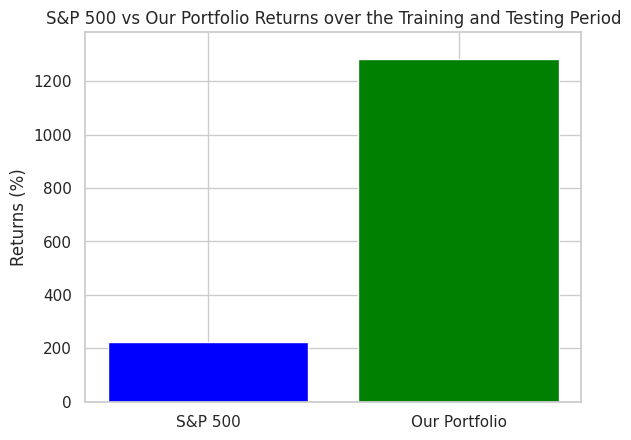

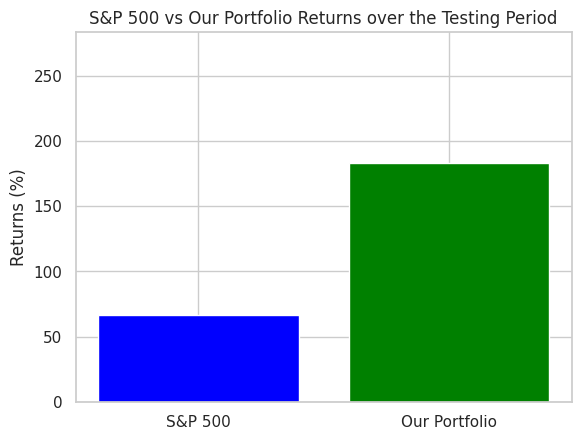

In [85]:
categories = ['S&P 500', 'Our Portfolio']
returns = [223, 1283]
plt.bar(categories, returns, color=['blue', 'green'])
plt.ylabel('Returns (%)')
plt.title('S&P 500 vs Our Portfolio Returns over the Training and Testing Period')
plt.ylim(0, max(returns) + 100)
plt.show()

categories = ['S&P 500', 'Our Portfolio']
returns = [66.80159084407742, 183.498147799943]
plt.bar(categories, returns, color=['blue', 'green'])
plt.ylabel('Returns (%)')
plt.title('S&P 500 vs Our Portfolio Returns over the Testing Period')
plt.ylim(0, max(returns) + 100)
plt.show()
